# Paso 1. Análisis Exploratorio de datos (EDA)
>Se realiza inicialmente el analisis exploratorio de datos para encontrar caracteristicas y tener un contexto más amplio de ellos, se cargara los dos archivos el json y el csv que contienen información relevante para el análisis.


In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el archivo CSV USVideos
df_videos = pd.read_csv(r"USvideos.csv")

# Cargar el archivo JSON 
with open(r"US_category_id.json", "r") as f:
    categorias = json.load(f)

In [3]:
# Inspección rápida del CSV
df_videos.head() # Primeras filas

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [4]:
print(df_videos.info())  # Información general (tipos de datos, valores nulos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
# Calcular valores faltantes
valores_nan = df_videos.isnull().sum()
porcentajes_nan = (valores_nan / len(df_videos)) * 100

# Crear un DataFrame con la información
df_nan = pd.DataFrame({
    'Nulos': valores_nan,
    'Porcentaje': porcentajes_nan
}).sort_values(by='Porcentaje',ascending=False)

print("Valores faltantes por columna:")
df_nan.head(16)

Valores faltantes por columna:


Nulos  Porcentaje
description               570    1.391975
video_id                    0    0.000000
trending_date               0    0.000000
title                       0    0.000000
channel_title               0    0.000000
category_id                 0    0.000000
publish_time                0    0.000000
tags                        0    0.000000
views                       0    0.000000
likes                       0    0.000000
dislikes                    0    0.000000
comment_count               0    0.000000
thumbnail_link              0    0.000000
comments_disabled           0    0.000000
ratings_disabled            0    0.000000
video_error_or_removed      0    0.000000

In [6]:
df_videos['description'] = df_videos['description'].fillna("")

In [7]:
# Convert category_id to string in both DataFrames
df_videos['category_id'] = df_videos['category_id'].astype(str)

In [8]:
df_videos.describe()  # Estadísticas descriptivas

views         likes      dislikes  comment_count
count  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04
mean   2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std    7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04
min    5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%    2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%    6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%    1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max    2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06

In [9]:
# Ver las primeras categorías del JSON
print(categorias.keys())  # Claves principales 
# Extraer las categorías
categorias_data = []
for item in categorias['items']:
    categoria = {
        'category_id': item['id'],  # ID de la categoría
        'category_name': item['snippet']['title']  # Nombre de la categoría
    }
    categorias_data.append(categoria)

# Convertir a DataFrame
categorias_df = pd.DataFrame(categorias_data)
# Ver el DataFrame de categorías
categorias_df.head()

dict_keys(['kind', 'etag', 'items'])


category_id     category_name
0           1  Film & Animation
1           2  Autos & Vehicles
2          10             Music
3          15    Pets & Animals
4          17            Sports

In [10]:
# Relación de categorías con cantidad de videos
categoria_counts = df_videos['category_id'].value_counts()
categoria_counts

category_id
24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: count, dtype: int64

In [11]:
# Distribución de las vistas, likes, dislikes
df_videos[['views', 'likes', 'dislikes']].describe()


views         likes      dislikes
count  4.094900e+04  4.094900e+04  4.094900e+04
mean   2.360785e+06  7.426670e+04  3.711401e+03
std    7.394114e+06  2.288853e+05  2.902971e+04
min    5.490000e+02  0.000000e+00  0.000000e+00
25%    2.423290e+05  5.424000e+03  2.020000e+02
50%    6.818610e+05  1.809100e+04  6.310000e+02
75%    1.823157e+06  5.541700e+04  1.938000e+03
max    2.252119e+08  5.613827e+06  1.674420e+06

0.6009426359618062
0.012381254731495275


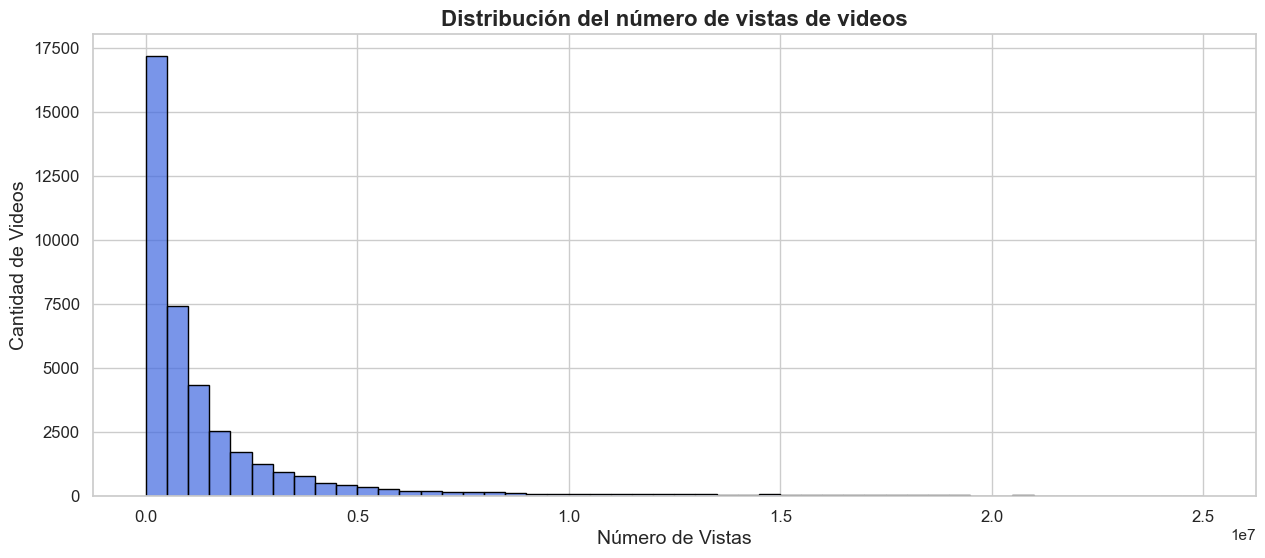

In [12]:
# Distribución de videos  segun el número de vistas, calcula una proporción de cuantos videos tienen menos de 1 millon de vistas
sns.set_theme(style="whitegrid", palette="muted")

plt.figure(figsize=(15, 6))  
sns.histplot(
    df_videos[df_videos['views'] < 25e6]['views'],  # Filtrado de vistas
    bins=50,  
    color="royalblue",  
    edgecolor="black",  
    alpha=0.7  
)

plt.title('Distribución del número de vistas de videos', fontsize=16, fontweight='bold')
plt.xlabel('Número de Vistas', fontsize=14)
plt.ylabel('Cantidad de Videos', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
print(df_videos[df_videos['views']<1e6]['views'].count()/df_videos['views'].count())
print(df_videos[df_videos['views']>25e6]['views'].count()/df_videos['views'].count())

>Mas del 60% de videos tienen menos de un millon de vistas y una proporción muy pequeña aproximadamente un 1.2% tiene mas de 25 millones de vistas

## 1.2 Relacionar Json con CSV

In [13]:
categorias_df['category_id'] = categorias_df['category_id'].astype(str)


In [14]:
# Realizar un merge para agregar la columna 'category_name' al DataFrame de videos
df_completo = df_videos.merge(categorias_df, on='category_id', how='left')

In [15]:
# Ver el DataFrame resultante
df_completo.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

  category_id              publish_time  \
0          22  2017-11-13T17:13:01.000Z   
1          24  2017-11-13T07:30:00.000Z   
2          23  2017-11-12T19:05:24.000Z   
3          24  2017-11-13T11:00:04.000Z   
4          24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description   category_name  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  People & Blogs  
1  One year after the presidential election, John...   Entertainment  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...          Comedy  
3  Today we find out if Link is a Nickelback amat...   Entertainment  
4  I know it's been a while since we did this sho...   Entertainment

## 1.3 Realice graficos para identificar cantidad de videos,vistas y likes por categorias

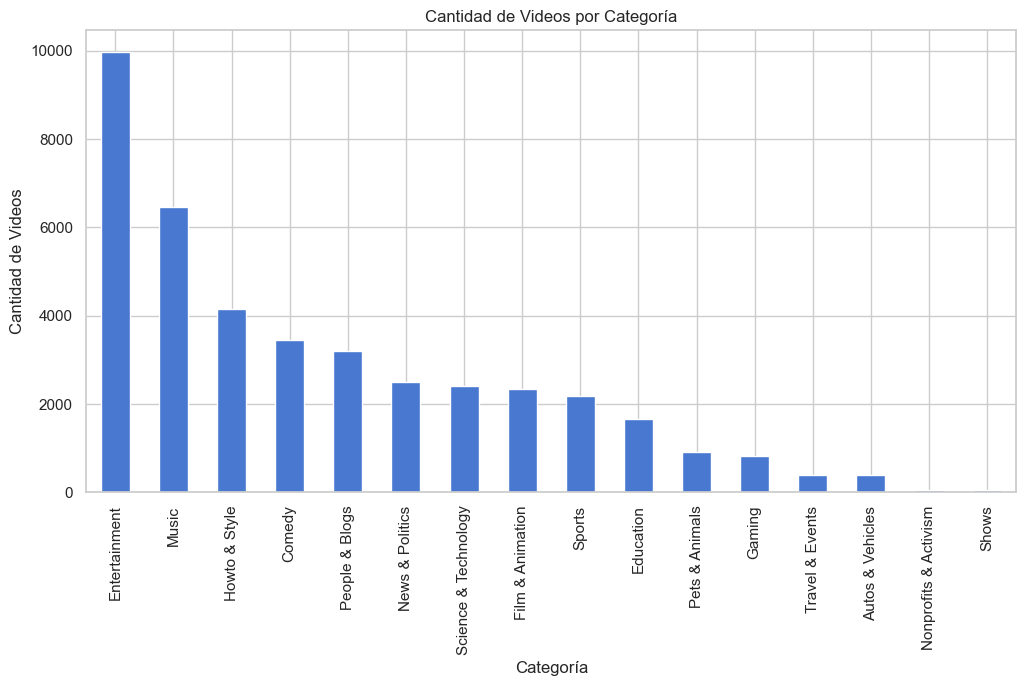

In [16]:
# Contar la cantidad de videos por categoría
categoria_counts = df_completo['category_name'].value_counts()
plt.figure(figsize=(12, 6))
categoria_counts.plot(kind='bar')
plt.title('Cantidad de Videos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Videos')
plt.xticks(rotation=90)
plt.show()

> Del anterior gráfico identificamos que la categoria que más cantidad de videos es la categoria *Entertainment* , seguido de la categoria *Music*

In [17]:
# Agrupar por categoría y obtener la suma de vistas, likes y dislikes
categoria_vistas = df_completo.groupby('category_name')['views'].sum().sort_values(ascending=False)
categoria_likes = df_completo.groupby('category_name')['likes'].sum().sort_values(ascending=False)
categoria_dislikes = df_completo.groupby('category_name')['dislikes'].sum().sort_values(ascending=False)

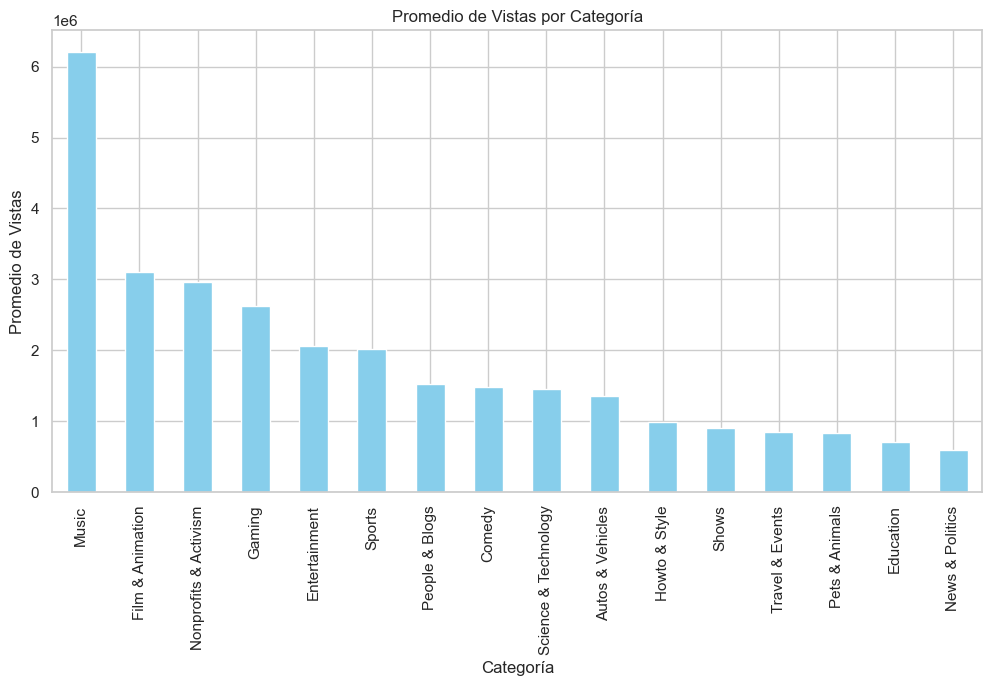

In [19]:
# Promedio de vistas por categoría
vistas_categoria = df_completo.groupby('category_name')['views'].mean().sort_values(ascending=False)

# Visualizar el promedio de vistas por categoría
plt.figure(figsize=(12, 6))
vistas_categoria.plot(kind='bar', color='skyblue')
plt.title('Promedio de Vistas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Promedio de Vistas')
plt.xticks(rotation=90)
plt.show()

> Del anterior gráfico identificamos que en promedio la categoria que más cantidad de vistas tiene es hay es *Music*, seguido de la categoria *Film and Animation* 

In [20]:
# Vistas de "Music" y vistas totales
music_views = categoria_vistas.get('Music', 0)  # Si no hay "Music", retorna 0
total_views = categoria_vistas.sum()

# Calcular la proporción en porcentaje
if total_views > 0:
    music_percentage = (music_views / total_views) * 100
else:
    music_percentage = 0

print(f'La categoría "Music" tiene el {music_percentage:.2f}% de las vistas totales.')

La categoría "Music" tiene el 41.51% de las vistas totales.


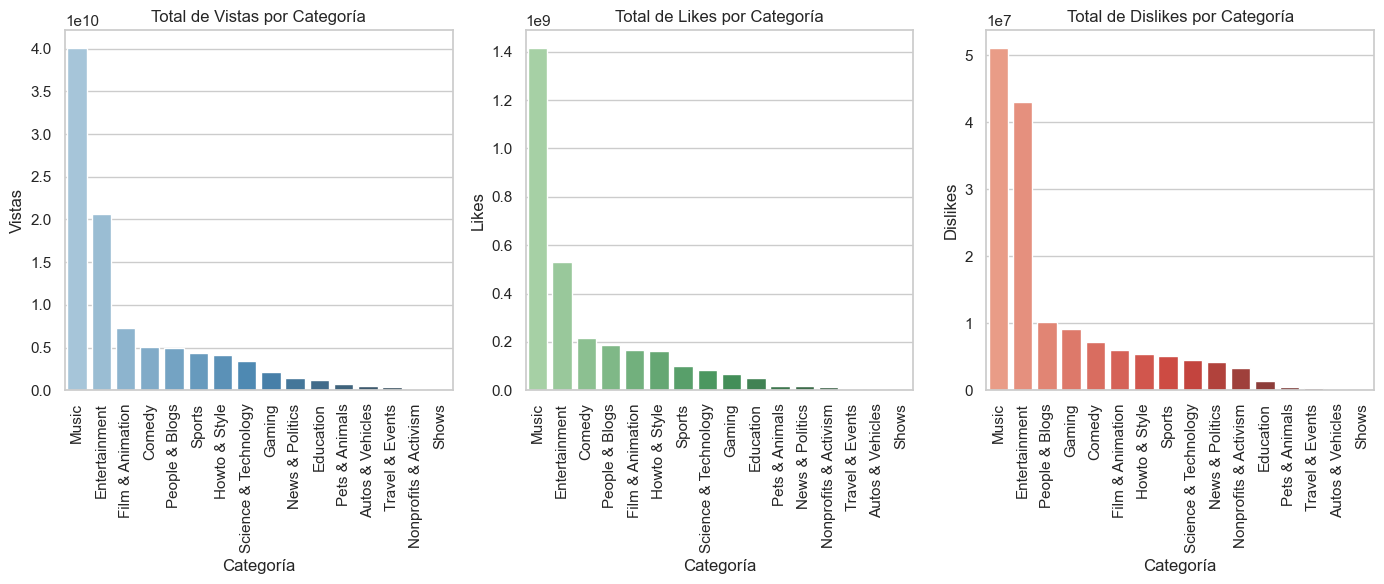

In [21]:
# Usar seaborn para los gráficos
plt.figure(figsize=(14, 6))

# Vistas por categoría (usando seaborn)
plt.subplot(1, 3, 1)
sns.barplot(x=categoria_vistas.index, y=categoria_vistas.values,hue=categoria_vistas.index, palette="Blues_d")
plt.title('Total de Vistas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Vistas')
plt.xticks(rotation=90)

# Likes por categoría (usando seaborn)
plt.subplot(1, 3, 2)
sns.barplot(x=categoria_likes.index, y=categoria_likes.values, hue=categoria_likes.index,palette="Greens_d")
plt.title('Total de Likes por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Likes')
plt.xticks(rotation=90)

# Dislikes por categoría (usando seaborn)
plt.subplot(1, 3, 3)
sns.barplot(x=categoria_dislikes.index, y=categoria_dislikes.values,hue=categoria_dislikes.index, palette="Reds_d")
plt.title('Total de Dislikes por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Dislikes')
plt.xticks(rotation=90)

# Ajustar el layout
plt.tight_layout()
plt.show()

> Del anterior gráfico identificamos que la categoria que más cantidad de vistas tiene es *Music*, seguido de la categoria *Entertainment*. Se identifica que los videos que mas reciben likes y dislikes tambien son los pertenecientes a la categoria *Entertainment*

In [22]:
# Iniciamos analisis mas riguroso de las variables cualitativas y cuantitativas
from scipy.stats import kurtosis, skew
var_vid = ['views', 'likes', 'dislikes', 'comment_count']
data = df_completo [var_vid]

In [23]:
# Crear un diccionario para almacenar las estadísticas
statistics = {
    'Mean': data.mean(),
    'Median': data.median(),
    'Kurtosis': data.apply(kurtosis),
    'Skewness': data.apply(skew)
}

# Convertir el diccionario a un DataFrame
stats_table = pd.DataFrame(statistics)

# Mostrar la tabla
stats_table

Mean    Median     Kurtosis   Skewness
views          2.360785e+06  681861.0   232.351734  12.239723
likes          7.426670e+04   18091.0   177.825222  10.923368
dislikes       3.711401e+03     631.0  1987.180463  40.187806
comment_count  8.446804e+03    1856.0   532.079064  19.753842

> Observamos primero que las *medias* y *mediana* son disimiles entre ellas, ademas la *kurtuosidad* nos habla de una distribución *leptocurtica* que nos indica que los valores estan agrupados en su mayoria cercanos a la media, adicionalmente la *simetria(Skewness)* nos muestra  una simetria positiva nos habla del sesgo que estan presentando los datos(sesgo a la derecha). Es probable que más adelante sea necesario transformar la variable

In [24]:
df_completo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  object
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

> Observamos primero que las *medias* y *mediana* son similares entre ellas, adicionalmente la *simetria(Skewness)* nos muestra  una simetria cercana a 0 nos habla de que las variables presentan poco sesgo que estan presentando los datos(sesgo a la derecha). Despues de transformar las variables estamos aproximandonos a variables normalizadas

## 2.2 Preparacion variables temporales para incluirlas dentro del análisis 

In [25]:
# Convertir Convertir las columnas de fecha a formato datetime
if 'publish_time' in df_completo.columns:
    df_completo['publish_time'] = pd.to_datetime(df_completo['publish_time'], errors='coerce').dt.tz_localize(None)
    df_completo['trending_date'] = pd.to_datetime(df_completo['trending_date'], format='%y.%d.%m', errors='coerce').dt.tz_localize(None)
    
# Crear nuevas variables temporales
df_completo['publish_year'] = df_completo['publish_time'].dt.year
df_completo['publish_month'] = df_completo['publish_time'].dt.month
df_completo['publish_week'] = df_completo['publish_time'].dt.weekday
df_completo['publish_day'] = df_completo['publish_time'].dt.day
df_completo['publish_hour'] = df_completo['publish_time'].dt.hour
#df_completo['days_to_trend'] = (df_completo['trending_date'] - df_completo['publish_time']).dt.days

In [26]:
print(df_completo['trending_date'].head())

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]


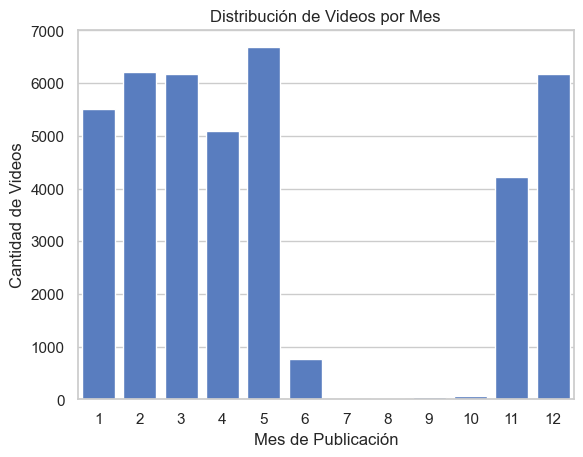

In [27]:
# Agrupación por mes y conteo de videos
monthly_videos = df_completo.groupby('publish_month').size()

# Gráfico
sns.barplot(x=monthly_videos.index, y=monthly_videos.values)
plt.title('Distribución de Videos por Mes')
plt.xlabel('Mes de Publicación')
plt.ylabel('Cantidad de Videos')
plt.show()

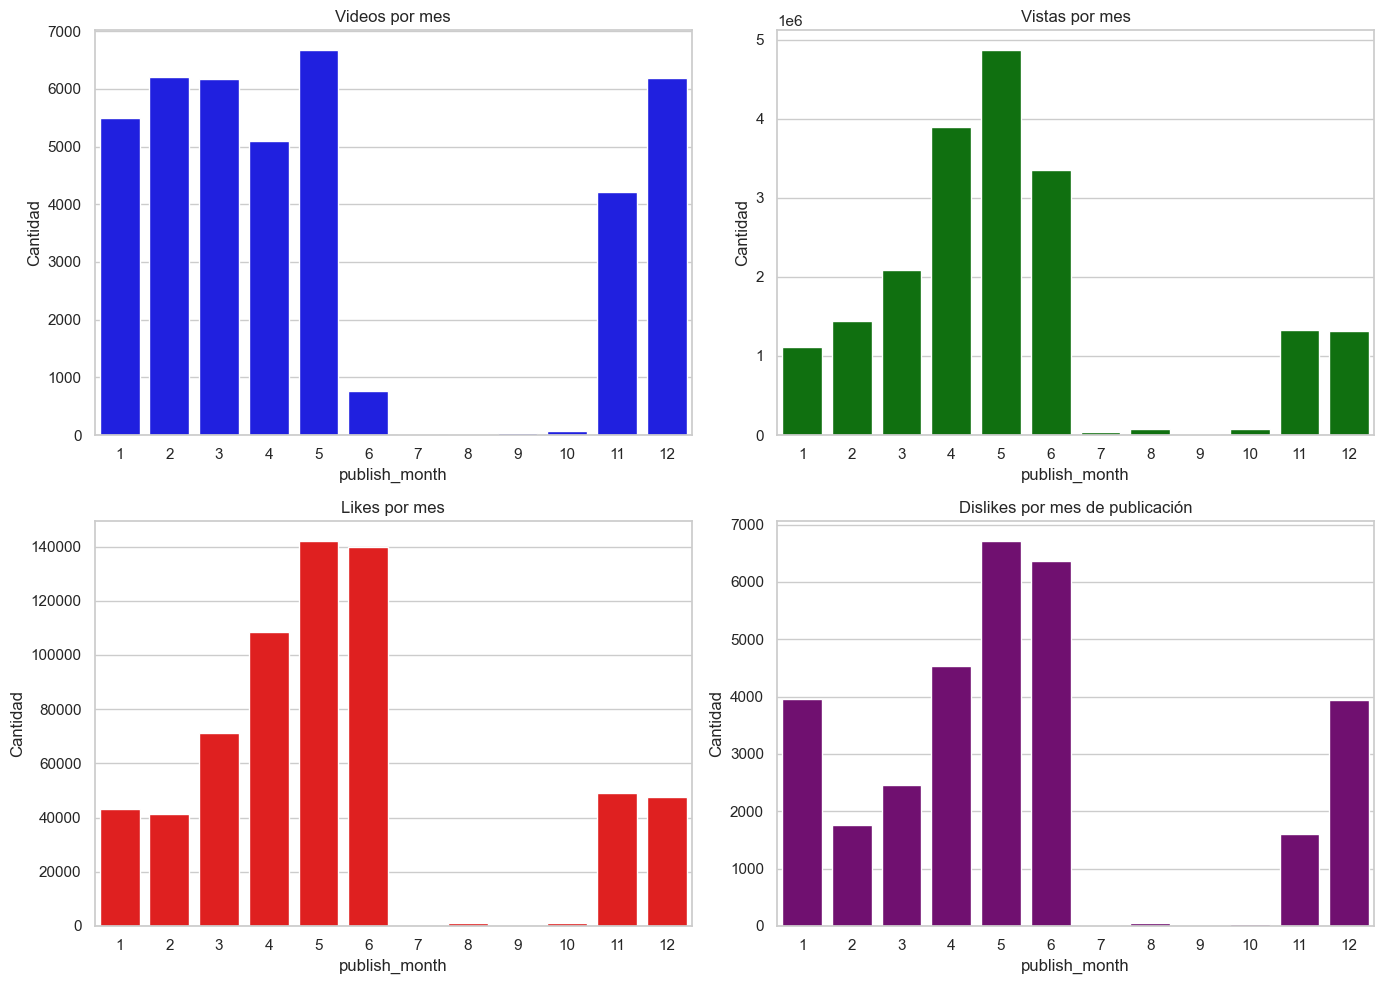

In [28]:
# Calcular métricas mensuales por agrupaciones temporales
monthly_dislikes = df_completo.groupby('publish_month')['dislikes'].mean()
monthly_likes = df_completo.groupby('publish_month')['likes'].mean()
monthly_vistas = df_completo.groupby('publish_month')['views'].mean()
monthly_videos = df_completo.groupby('publish_month').size()

# Crear una lista con las métricas y sus títulos correspondientes
metricas_m = [monthly_videos, monthly_vistas, monthly_likes, monthly_dislikes]
titles = ['Videos por mes', 
          'Vistas por mes', 
          'Likes por mes', 
          'Dislikes por mes de publicación']
colors = ['blue', 'green', 'red', 'purple']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, metric in enumerate(metricas_m):
    row, col = divmod(i, 2) 
    sns.barplot(x=metric.index, y=metric.values, ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(titles[i])
    axes[row, col].set_ylabel("Cantidad")
plt.tight_layout()
plt.show()

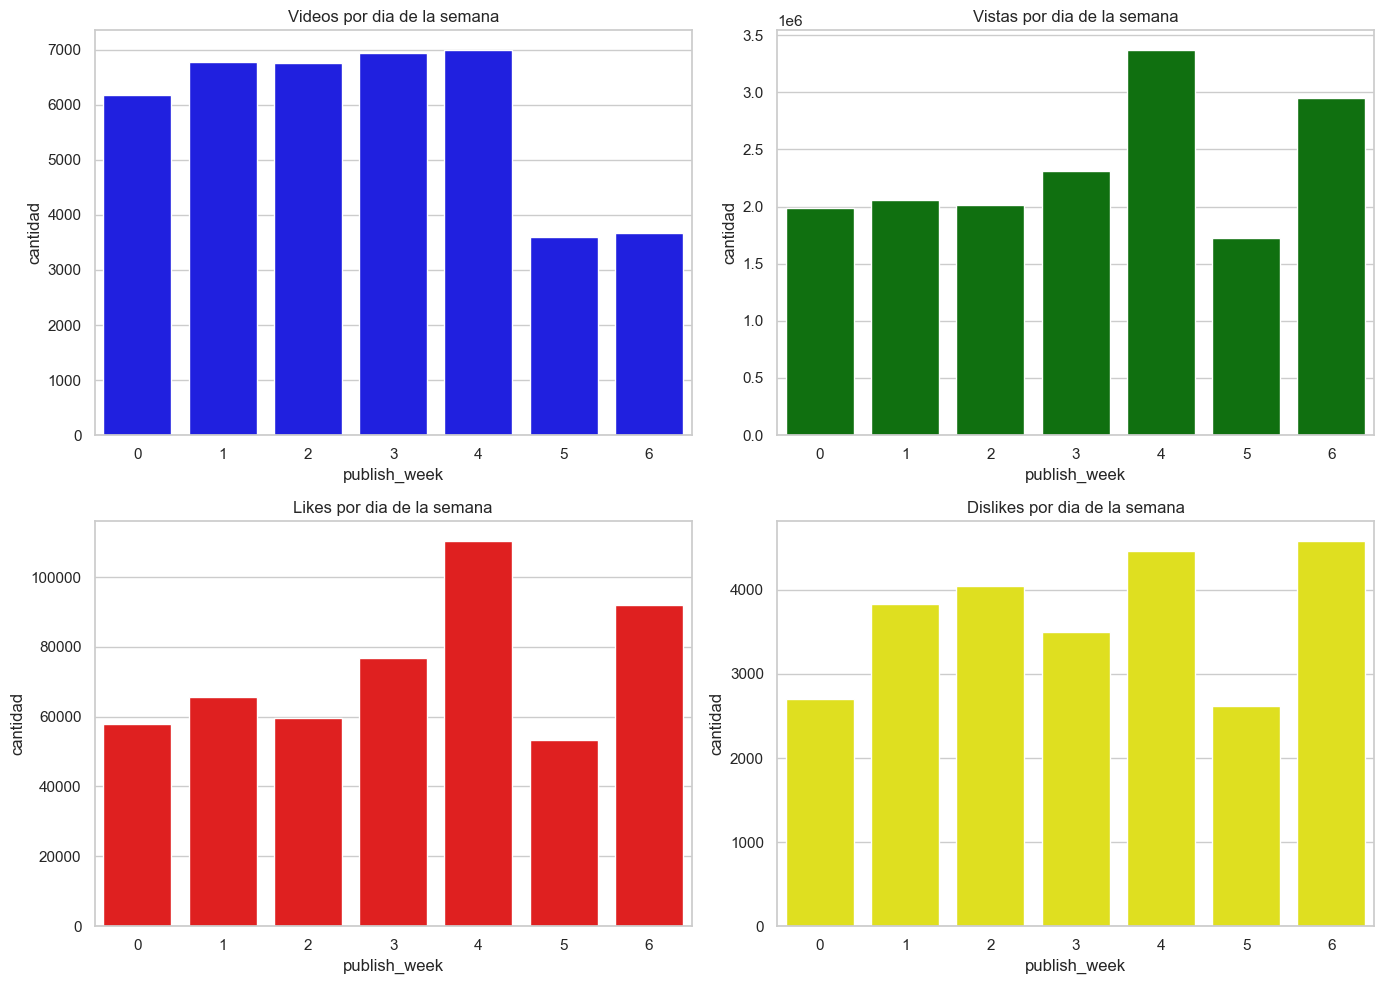

In [29]:
# Calcular métricas semanales por agrupaciones temporales
week_dislikes = df_completo.groupby('publish_week')['dislikes'].mean()
week_likes = df_completo.groupby('publish_week')['likes'].mean()
week_vistas = df_completo.groupby('publish_week')['views'].mean()
week_videos = df_completo.groupby('publish_week').size()

# Crear una lista con las métricas y sus títulos correspondientes
metricas_m = [week_videos, week_vistas, week_likes, week_dislikes]
titles = ['Videos por dia de la semana', 
          'Vistas por dia de la semana', 
          'Likes por dia de la semana', 
          'Dislikes por dia de la semana']
colors = ['blue', 'green', 'red', 'yellow']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, metric in enumerate(metricas_m):
    row, col = divmod(i, 2) 
    sns.barplot(x=metric.index, y=metric.values, ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(titles[i])
    axes[row, col].set_ylabel("cantidad")
plt.tight_layout()
plt.show()

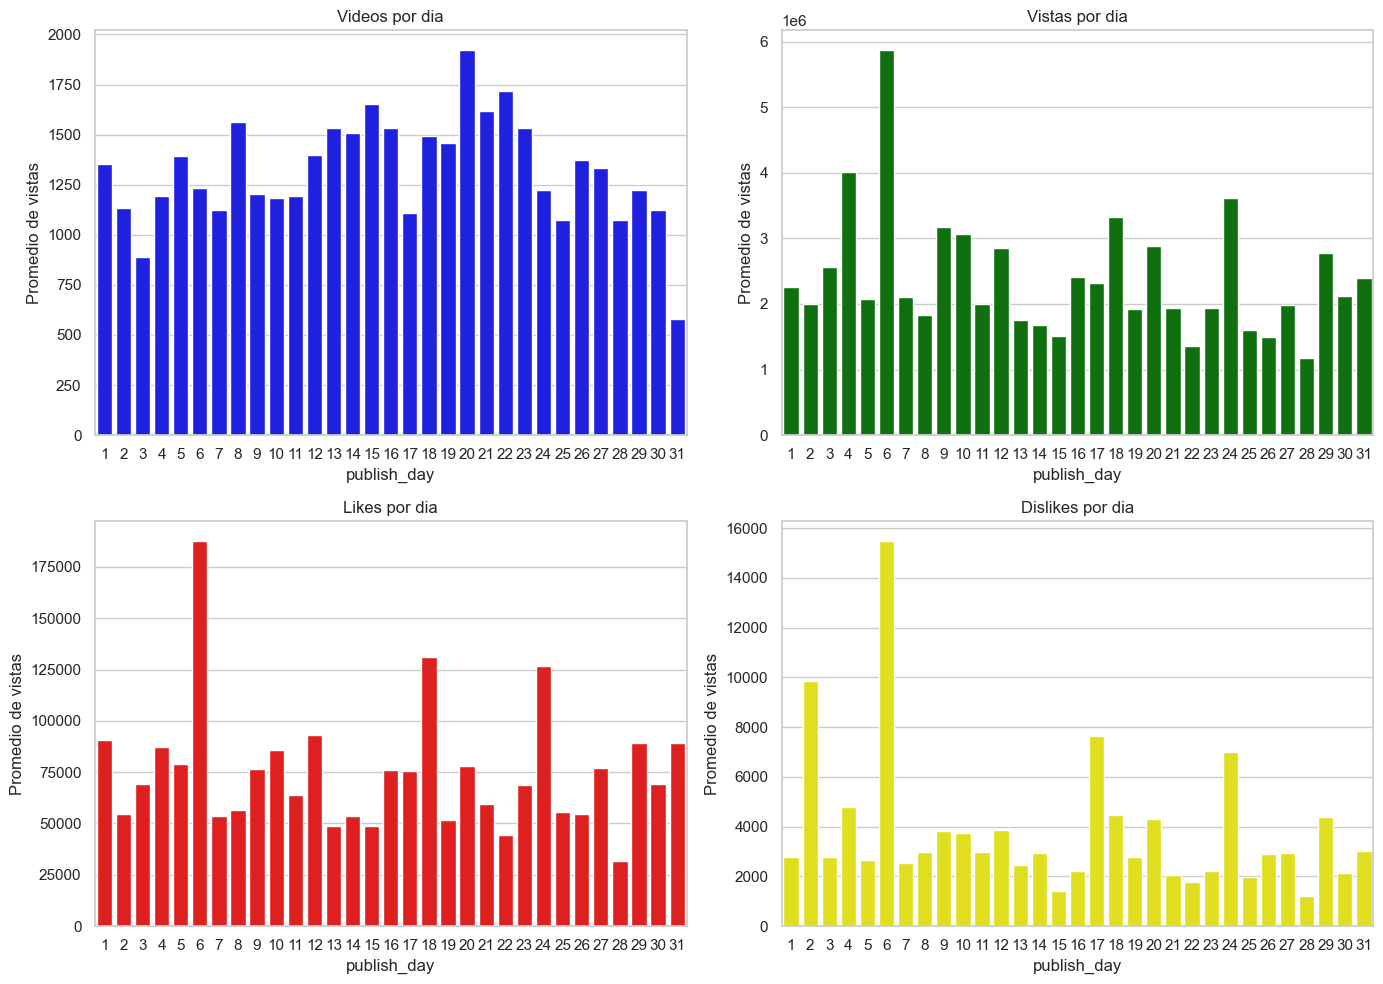

In [30]:
# Calcular métricas semanales por agrupaciones temporales
day_dislikes = df_completo.groupby('publish_day')['dislikes'].mean()
day_likes = df_completo.groupby('publish_day')['likes'].mean()
day_vistas = df_completo.groupby('publish_day')['views'].mean()
day_videos = df_completo.groupby('publish_day').size()

# Crear una lista con las métricas y sus títulos correspondientes
metricas_m = [day_videos, day_vistas, day_likes, day_dislikes]
titles = ['Videos por dia', 
          'Vistas por dia', 
          'Likes por dia', 
          'Dislikes por dia']
colors = ['blue', 'green', 'red', 'yellow']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, metric in enumerate(metricas_m):
    row, col = divmod(i, 2) 
    sns.barplot(x=metric.index, y=metric.values, ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(titles[i])
    axes[row, col].set_ylabel("Promedio de vistas")
plt.tight_layout()
plt.show()

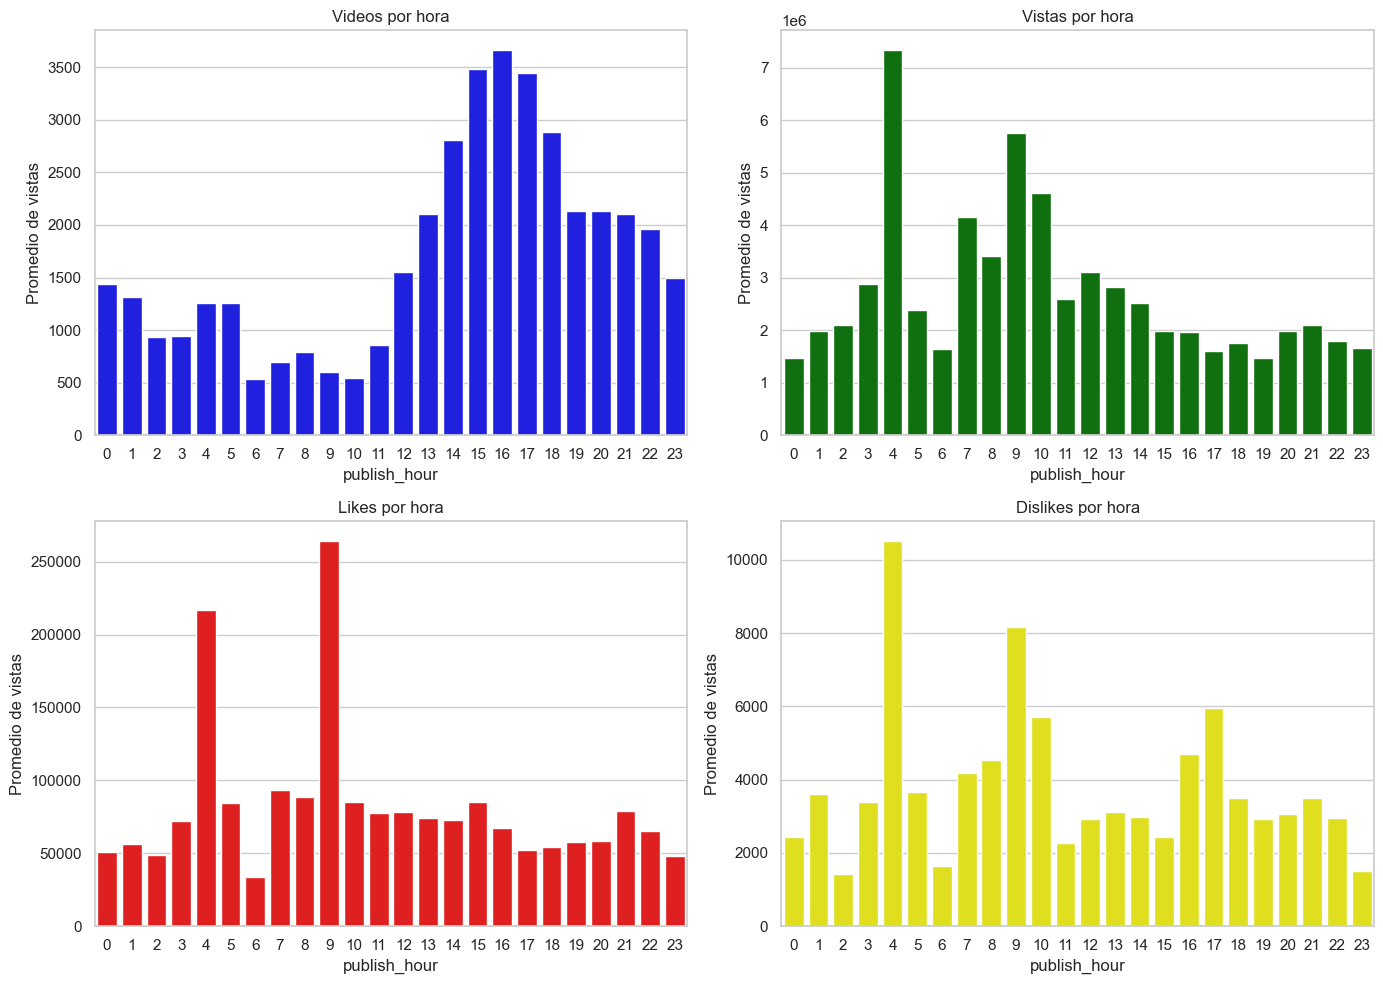

In [31]:
# Calcular métricas semanales por agrupaciones temporales
hour_dislikes = df_completo.groupby('publish_hour')['dislikes'].mean()
hour_likes = df_completo.groupby('publish_hour')['likes'].mean()
hour_vistas = df_completo.groupby('publish_hour')['views'].mean()
hour_videos = df_completo.groupby('publish_hour').size()

# Crear una lista con las métricas y sus títulos correspondientes
metricas_m = [hour_videos, hour_vistas, hour_likes, hour_dislikes]
titles = ['Videos por hora', 
          'Vistas por hora', 
          'Likes por hora', 
          'Dislikes por hora']
colors = ['blue', 'green', 'red', 'yellow']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, metric in enumerate(metricas_m):
    row, col = divmod(i, 2) 
    sns.barplot(x=metric.index, y=metric.values, ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(titles[i])
    axes[row, col].set_ylabel("Promedio de vistas")
plt.tight_layout()
plt.show()

In [32]:
df_completo.head()

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

  category_id        publish_time  \
0          22 2017-11-13 17:13:01   
1          24 2017-11-13 07:30:00   
2          23 2017-11-12 19:05:24   
3          24 2017-11-13 11:00:04   
4          24 2017-11-12 18:01:41   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  comments_disabled ratings_disabled  video_error_or_removed  \
0      2966  ...              False            False                   False   
1      6146  ...              False            False                   False   
2      5339  ...              False            False                   False   
3       666  ...              False            False                   False   
4      1989  ...              False            False                   False   

                                         description   category_name  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  People & Blogs   
1  One year after the presidential election, John...   Entertainment   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...          Comedy   
3  Today we find out if Link is a Nickelback amat...   Entertainment   
4  I know it's been a while since we did this sho...   Entertainment   

  publish_year publish_month  publish_week  publish_day  publish_hour  
0         2017            11             0           13            17  
1         2017            11             0           13             7  
2         2017            11             6           12            19  
3         2017            11             0           13            11  
4         2017            11             6           12            18  

[5 rows x 22 columns]

In [33]:
df_completo['days_to_trend'] = (df_completo['trending_date'].dt.tz_localize(None) - df_completo['publish_time'].dt.tz_localize(None)).dt.days

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


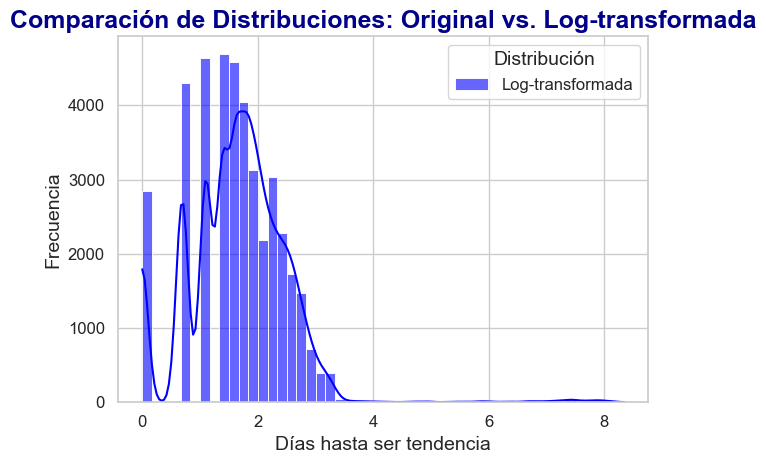

In [34]:
df_completo['log_days_to_trend'] = np.log1p(df_completo['days_to_trend'])
# Histograma de la distribución log-transformada
sns.histplot(
    df_completo['log_days_to_trend'], 
    bins=50, 
    kde=True, 
    color="blue", 
    label="Log-transformada", 
    alpha=0.6
)
plt.title("Comparación de Distribuciones: Original vs. Log-transformada", fontsize=18, fontweight="bold", color="darkblue")
plt.xlabel("Días hasta ser tendencia", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Distribución", fontsize=12, title_fontsize=14, loc="upper right")
plt.tight_layout()
plt.show()

> la mayoria de videos para ser tendencia tardan entre 1 y 2 días

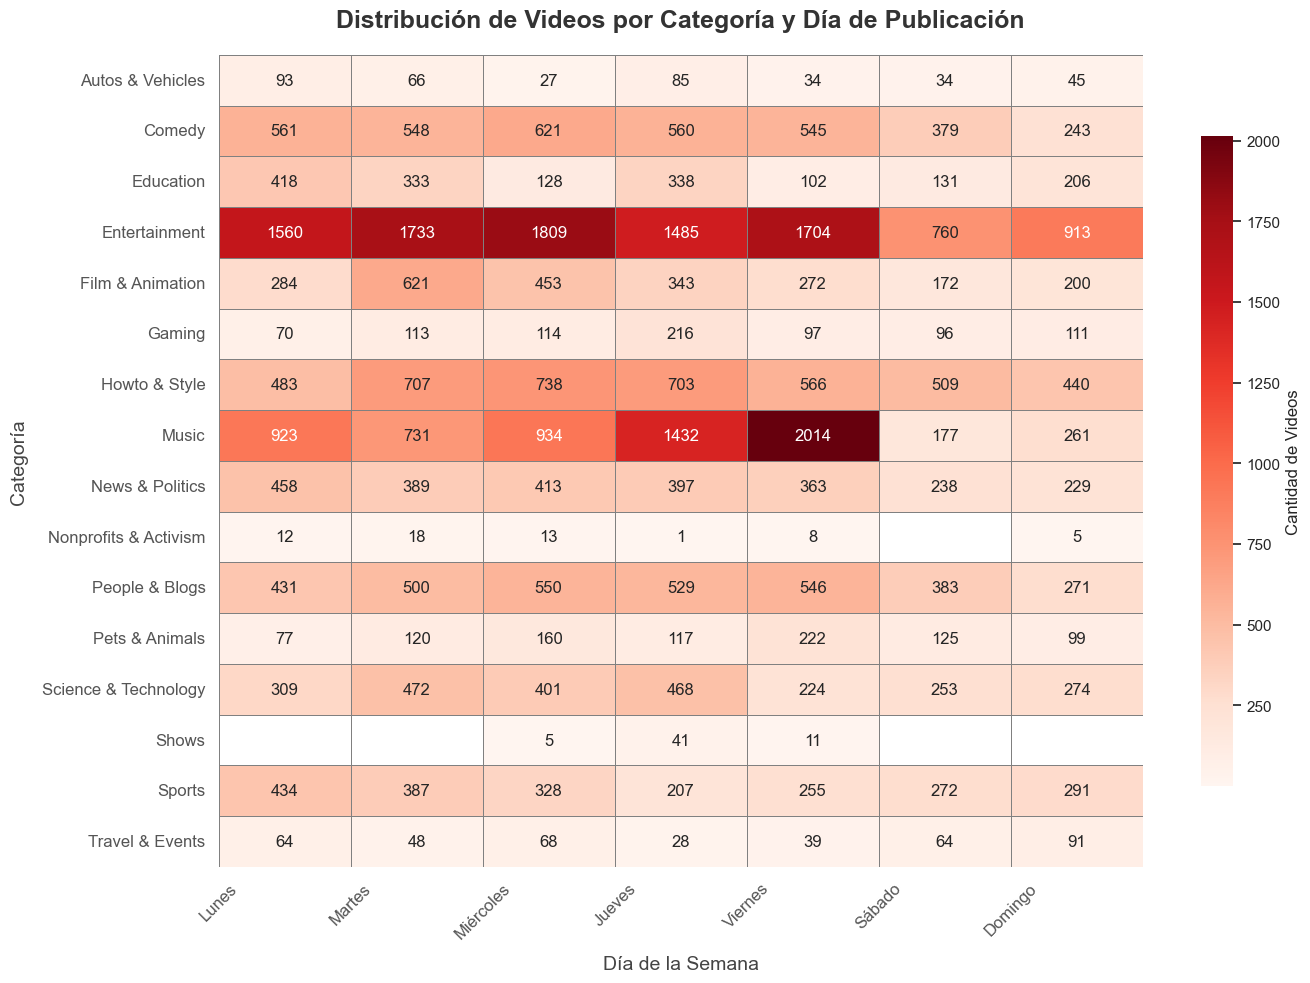

In [35]:
# Frecuencia de publicaciones por categoría y día de la semana
categoria_week = df_completo.groupby(['category_name', 'publish_week']).size().unstack()
# Crear el gráfico
plt.figure(figsize=(14, 10))
sns.heatmap(
    categoria_week,
    annot=True,
    fmt=".0f",
    cmap="Reds",
    linewidths=0.5,  # Agregar separación entre celdas
    linecolor='gray',  # Color de las líneas
    cbar_kws={'shrink': 0.8, 'label': 'Cantidad de Videos'}  # Personalizar barra de color
)

# Título y etiquetas
plt.title("Distribución de Videos por Categoría y Día de Publicación", fontsize=18, fontweight='bold', color='#333333', loc='center', pad=20)
plt.xlabel("Día de la Semana", fontsize=14, labelpad=10, color='#444444')
plt.ylabel("Categoría", fontsize=14, labelpad=10, color='#444444')

# Etiquetas personalizadas en los ejes
plt.xticks(ticks=range(7), labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], fontsize=12, rotation=45, color='#555555')
plt.yticks(fontsize=12, color='#555555')

# Mejorar estética general
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

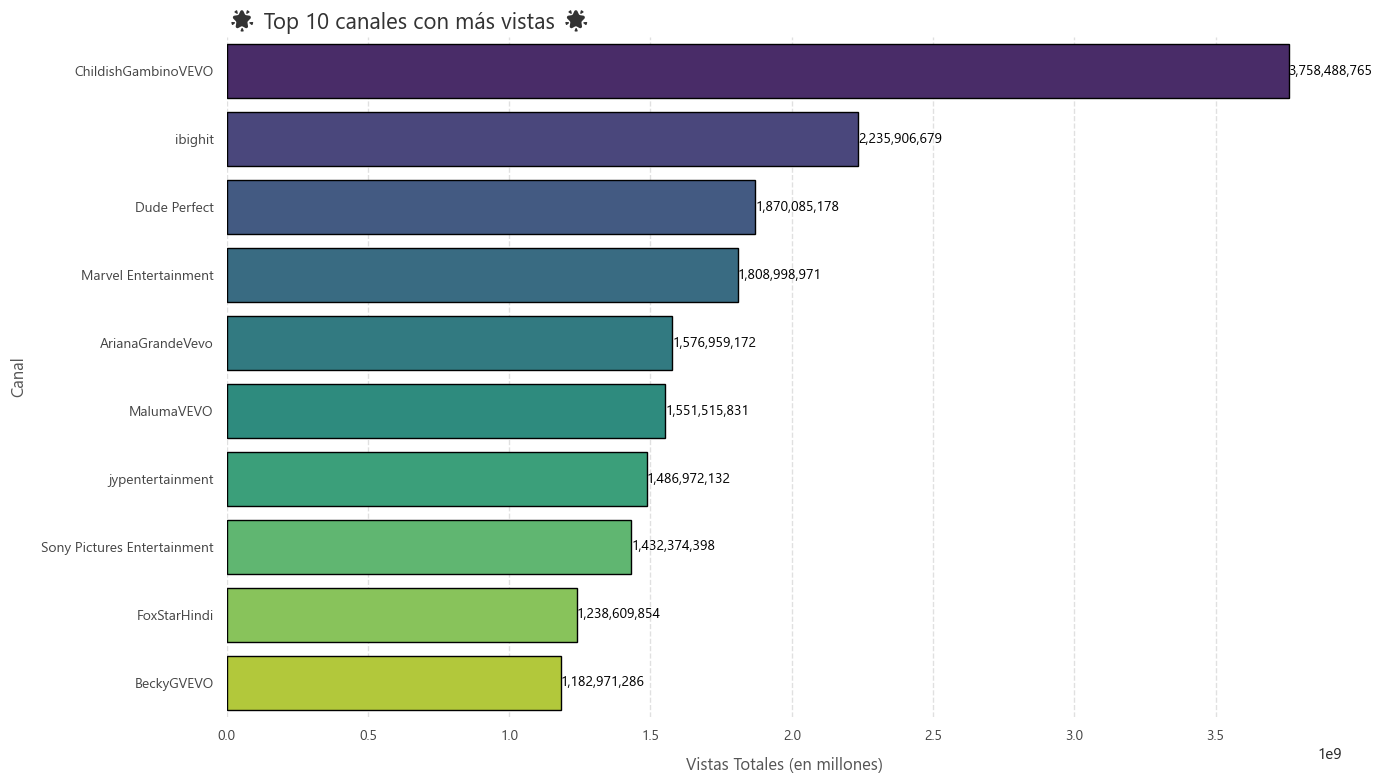

In [36]:
from matplotlib import rcParams
chanel_views = df_completo.groupby('channel_title')['views'].sum().sort_values(ascending=False).head(10)
rcParams['font.family'] = 'Segoe UI Emoji'
# Configuración del gráfico
plt.figure(figsize=(14, 8))
sns.barplot(x=chanel_views.values, y=chanel_views.index,hue=chanel_views.index, palette='viridis', edgecolor="black")

# Agregar etiquetas de valores sobre las barras
for index, value in enumerate(chanel_views.values):
    plt.text(value + 50000, index, f"{value:,}", va='center', ha='left', fontsize=10, color='black')

# Títulos y etiquetas
plt.title("🌟 Top 10 canales con más vistas 🌟", fontsize=16, fontweight='bold', color='#333333', loc='left')
plt.xlabel("Vistas Totales (en millones)", fontsize=12, labelpad=10, color='#555555')
plt.ylabel("Canal", fontsize=12, labelpad=10, color='#555555')

# Mejoras estéticas
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10, color='#444444')
plt.yticks(fontsize=10, color='#444444')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

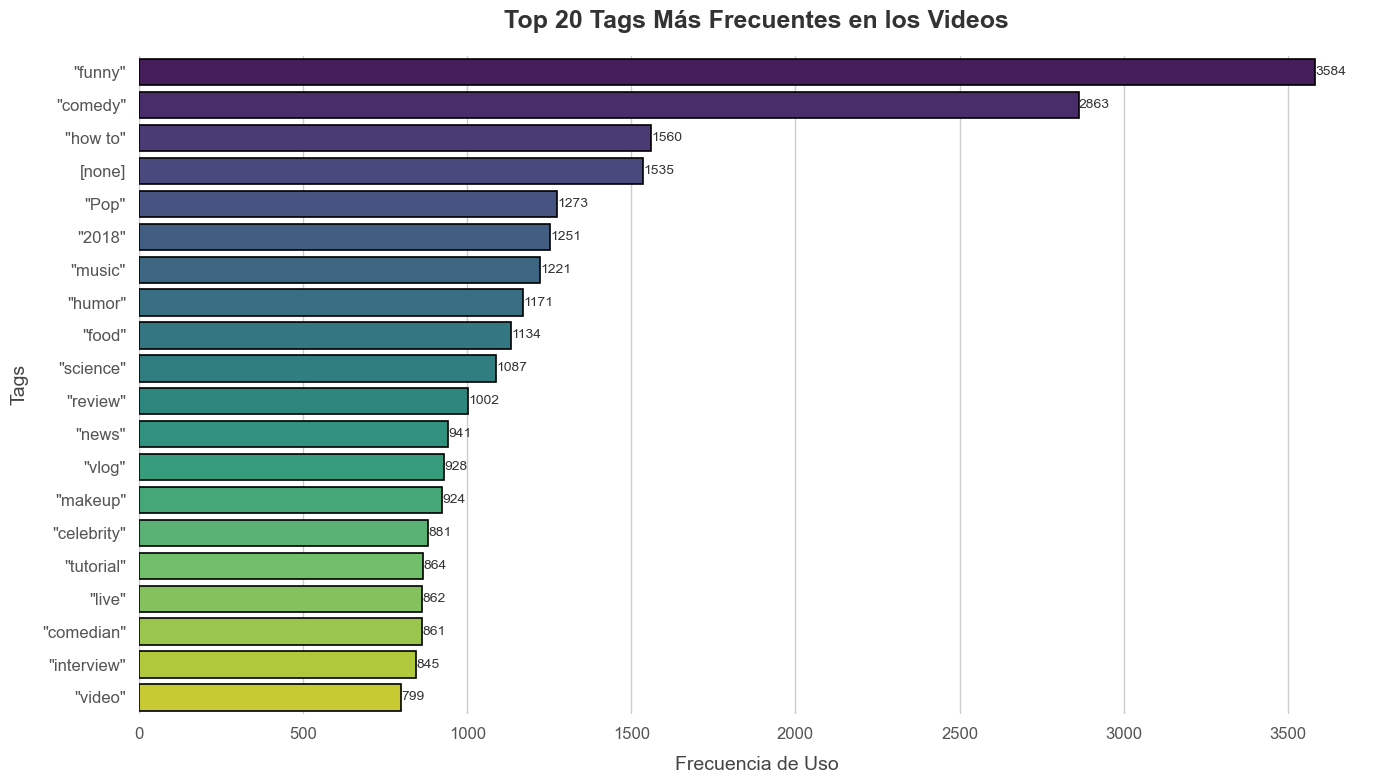

In [37]:
from collections import Counter

# Dividir los tags en palabras individuales
tags_list = df_completo['tags'].dropna().str.split('|').sum()
tag_counts = Counter(tags_list).most_common(20)

# Convertir a un DataFrame
tag_counts_df = pd.DataFrame(tag_counts, columns=['Tag', 'Frequency'])

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(14, 8))
sns.barplot(
    data=tag_counts_df,
    x='Frequency',
    y='Tag',
    hue='Tag',
    palette='viridis',  
    edgecolor='black',  # Bordes en las barras
    linewidth=1.2
)

# Personalizar el título y etiquetas
plt.title("Top 20 Tags Más Frecuentes en los Videos", fontsize=18, fontweight='bold', color='#333333', loc='center', pad=20)
plt.xlabel("Frecuencia de Uso", fontsize=14, labelpad=10, color='#444444')
plt.ylabel("Tags", fontsize=14, labelpad=10, color='#444444')

# Estilizar las etiquetas de los ejes
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

# Agregar anotaciones de frecuencia en cada barra
for index, value in enumerate(tag_counts_df['Frequency']):
    plt.text(value + 1, index, str(value), va='center', ha='left', fontsize=10, color='#333333')

# Optimizar el diseño
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [38]:
tag_views = []
for tag in tag_counts_df['Tag']:
    tag_videos = df_completo[df_completo['tags'].str.contains(tag, na=False)]
    tag_views.append(tag_videos['views'].mean())

tag_counts_df['promedio_vis'] = tag_views

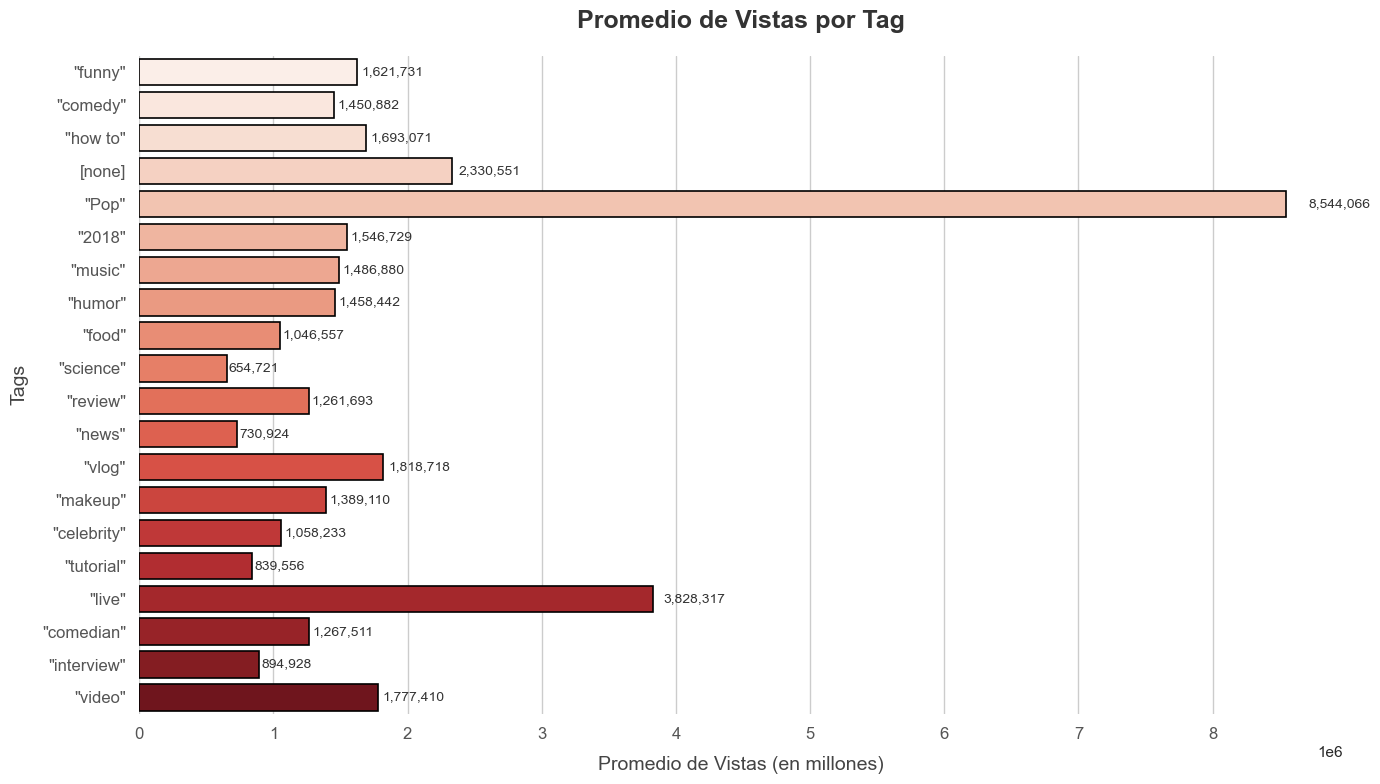

In [39]:
# Crear un DataFrame para analizar tags y vistas

sns.set_theme(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(14, 8))
sns.barplot(
    data=tag_counts_df,
    x='promedio_vis',
    y='Tag',
    hue='Tag',
    palette='Reds', 
    edgecolor='black',  
    linewidth=1.2
)

# Personalizar el título y etiquetas
plt.title(
    "Promedio de Vistas por Tag",
    fontsize=18,
    fontweight='bold',
    color='#333333',
    loc='center',
    pad=20
)
plt.xlabel("Promedio de Vistas (en millones)", fontsize=14, labelpad=10, color='#444444')
plt.ylabel("Tags", fontsize=14, labelpad=10, color='#444444')

# Estilizar las etiquetas de los ejes
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

# Agregar anotaciones de vistas promedio en cada barra
for index, value in enumerate(tag_counts_df['promedio_vis']):
    plt.text(
        value + (value * 0.02),  # Desplazamiento pequeño para no solapar
        index,
        f"{value:,.0f}",  # Formato legible (sin decimales)
        va='center',
        ha='left',
        fontsize=10,
        color='#333333'
    )

# Optimizar el diseño
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

> Tags como Pop y live tienen mayor cantidad de vistas respecto a otros 

In [40]:
from wordcloud import WordCloud
import re

In [41]:
df_completo['title_clean'] = df_completo['title'].dropna().apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x.lower()))
df_completo['description_clean'] = df_completo['description'].fillna('').apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x).lower()))

In [42]:
# Contar el número de palabras en título y descripción
df_completo['title_word_count'] = df_completo['title_clean'].apply(lambda x: len(x.split()))
df_completo['description_word_count'] = df_completo['description_clean'].apply(lambda x: len(x.split()))

# Mostrar las primeras filas del DataFrame
print(df_completo[['title', 'title_word_count', 'description', 'description_word_count']].head())

                                               title  title_word_count  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE                 7   
1  The Trump Presidency: Last Week Tonight with J...                10   
2  Racist Superman | Rudy Mancuso, King Bach & Le...                 8   
3                   Nickelback Lyrics: Real or Fake?                 5   
4                           I Dare You: GOING BALD!?                 5   

                                         description  description_word_count  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...                     124  
1  One year after the presidential election, John...                      80  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...                      53  
3  Today we find out if Link is a Nickelback amat...                     118  
4  I know it's been a while since we did this sho...                      53  


In [43]:
# Contar las palabras más comunes en el título
title_words = ' '.join(df_completo['title_clean'].dropna()).split()
title_word_counts = Counter(title_words)
top_title_words = title_word_counts.most_common(20)

# Contar las palabras más comunes en la descripción
description_words = ' '.join(df_completo['description_clean'].dropna()).split()
description_word_counts = Counter(description_words)
top_description_words = description_word_counts.most_common(20)

# Mostrar las palabras más comunes
print("Top 20 palabras en títulos:", top_title_words)
print("Top 20 palabras en descripciones:", top_description_words)

Top 20 palabras en títulos: [('the', 10006), ('a', 4821), ('to', 4286), ('official', 3941), ('in', 3363), ('of', 3166), ('video', 2864), ('with', 2834), ('on', 2366), ('and', 2356), ('2018', 2238), ('i', 2072), ('my', 2041), ('trailer', 2000), ('how', 1839), ('for', 1790), ('you', 1744), ('is', 1724), ('ft', 1301), ('from', 1258)]
Top 20 palabras en descripciones: [('the', 157137), ('and', 98831), ('to', 96330), ('on', 70830), ('a', 65778), ('of', 64091), ('for', 46811), ('in', 45941), ('you', 41764), ('with', 32517), ('is', 31812), ('i', 31627), ('by', 29375), ('this', 26022), ('my', 23949), ('more', 21735), ('from', 20534), ('at', 19784), ('it', 19413), ('video', 18984)]


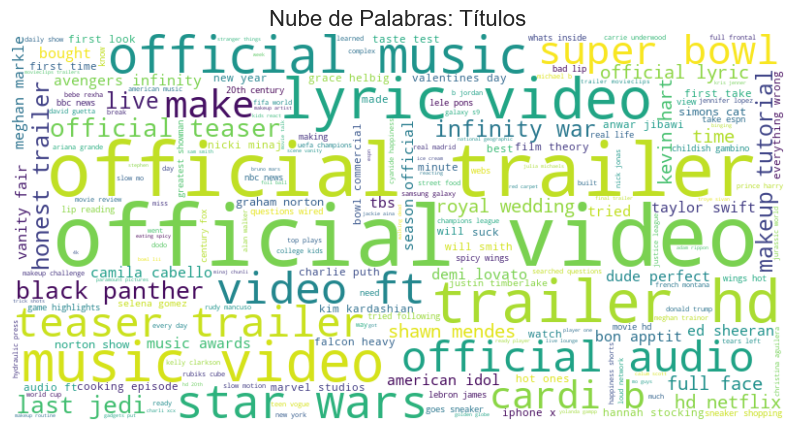

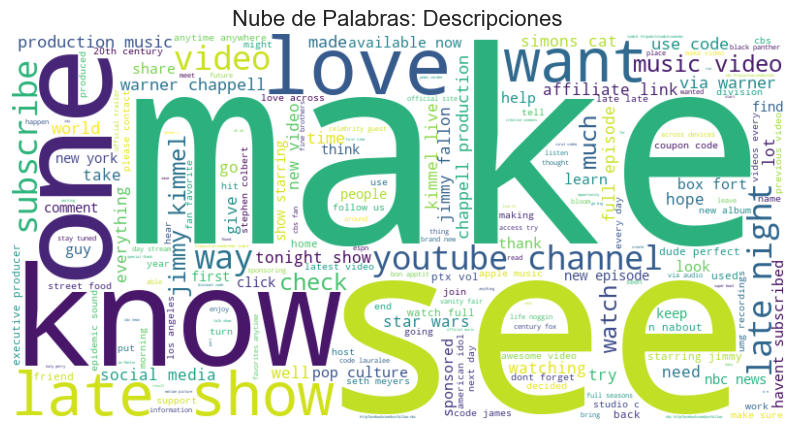

In [44]:
# Nube de palabras para los títulos
wordcloud_title = WordCloud(width=800, height=400, background_color="white").generate(' '.join(title_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.title("Nube de Palabras: Títulos", fontsize=16)
plt.axis('off')
plt.show()

# Nube de palabras para las descripciones
wordcloud_description = WordCloud(width=800, height=400, background_color="white").generate(' '.join(description_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_description, interpolation='bilinear')
plt.title("Nube de Palabras: Descripciones", fontsize=16)
plt.axis('off')
plt.show()

                        title_word_count  description_word_count     views
title_word_count                1.000000                0.108124 -0.057256
description_word_count          0.108124                1.000000 -0.017352
views                          -0.057256               -0.017352  1.000000
                        title_word_count  description_word_count     likes
title_word_count                1.000000                0.108124 -0.097802
description_word_count          0.108124                1.000000 -0.034059
likes                          -0.097802               -0.034059  1.000000


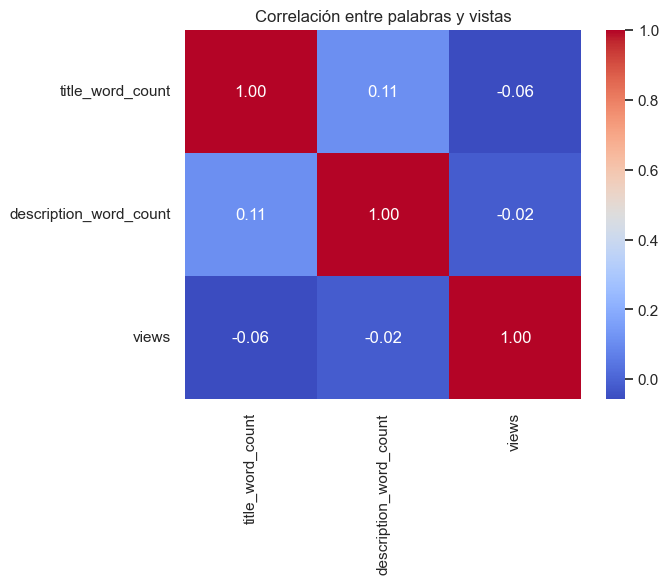

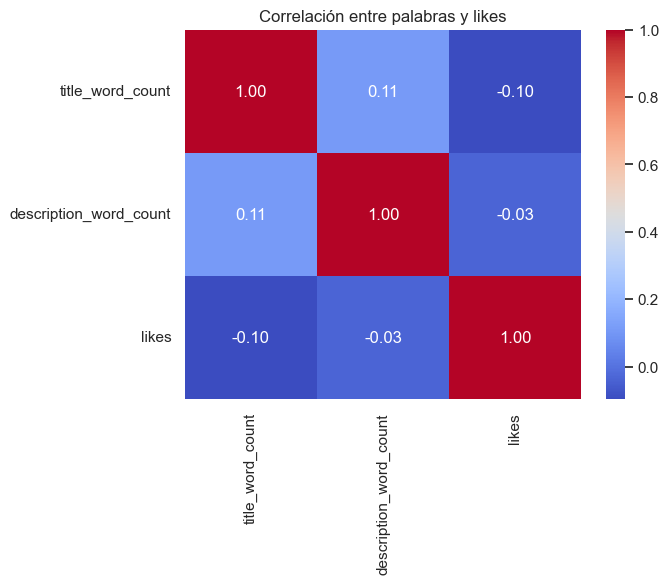

In [45]:
# Correlación entre el número de palabras y vistas
correlation_words_views = df_completo[['title_word_count', 'description_word_count', 'views']].corr()
print(correlation_words_views)

# Correlación entre el número de palabras y likes
correlation_words_likes = df_completo[['title_word_count', 'description_word_count', 'likes']].corr()
print(correlation_words_likes)

# Graficar las correlaciones
sns.heatmap(correlation_words_views, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre palabras y vistas")
plt.show()

sns.heatmap(correlation_words_likes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre palabras y likes")
plt.show()

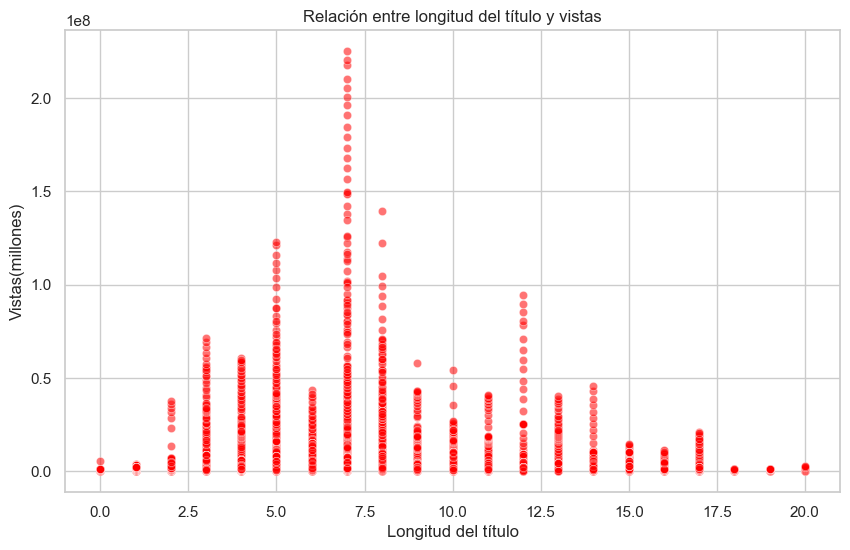

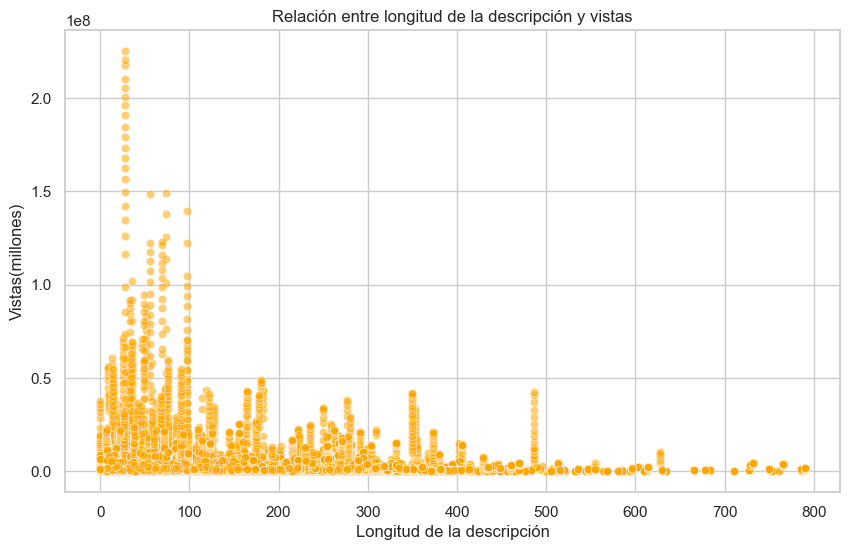

In [46]:
# Relación entre longitud del título y vistas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_completo, x='title_word_count', y='views', alpha=0.55, color='red')
plt.title("Relación entre longitud del título y vistas")
plt.xlabel("Longitud del título")
plt.ylabel("Vistas(millones)")
plt.show()

# Relación entre longitud de la descripción y vistas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_completo, x='description_word_count', y='views', alpha=0.55, color='orange')
plt.title("Relación entre longitud de la descripción y vistas")
plt.xlabel("Longitud de la descripción")
plt.ylabel("Vistas(millones)")
plt.show()

> La longitud del título y las visualizaciones no tienen ninguna correlación, pero se puede observar que los títulos con una longitud entre 5 y 8 palabras tienen más vistas.

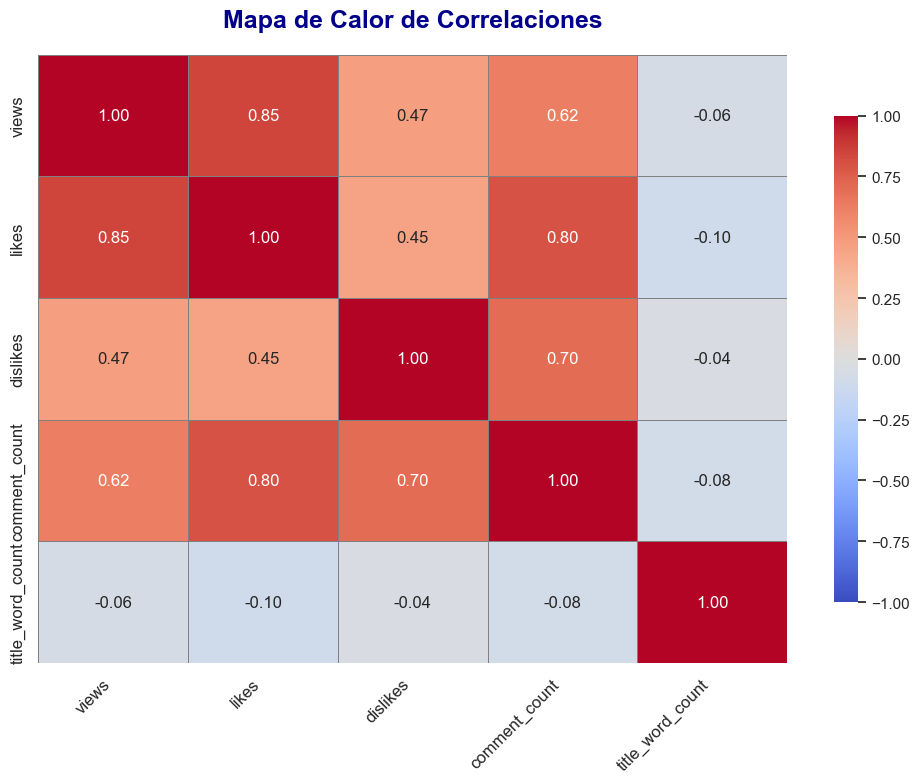

In [47]:
# Calcular la matriz de correlación
corr_matrix = df_completo[['views', 'likes', 'dislikes', 'comment_count', 'title_word_count']].corr()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8)) 
sns.heatmap(
    corr_matrix, 
    annot=True,  
    fmt=".2f",  
    cmap="coolwarm", 
    vmin=-1, vmax=1,  
    linewidths=0.5,  
    linecolor='gray',
    cbar_kws={"shrink": 0.8, "aspect": 20}
)

plt.title('Mapa de Calor de Correlaciones', fontsize=18, fontweight='bold', color='darkblue', pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

> Las visualizaciones y los "likes" están altamente correlacionados con un coeficiente de 0,85. Los "likes" y la cantidad de comentarios tienen un coeficiente de correlación de 0,8. Los "No me gusta" y la cantidad de comentarios tienen un coeficiente de correlación de 0,7.

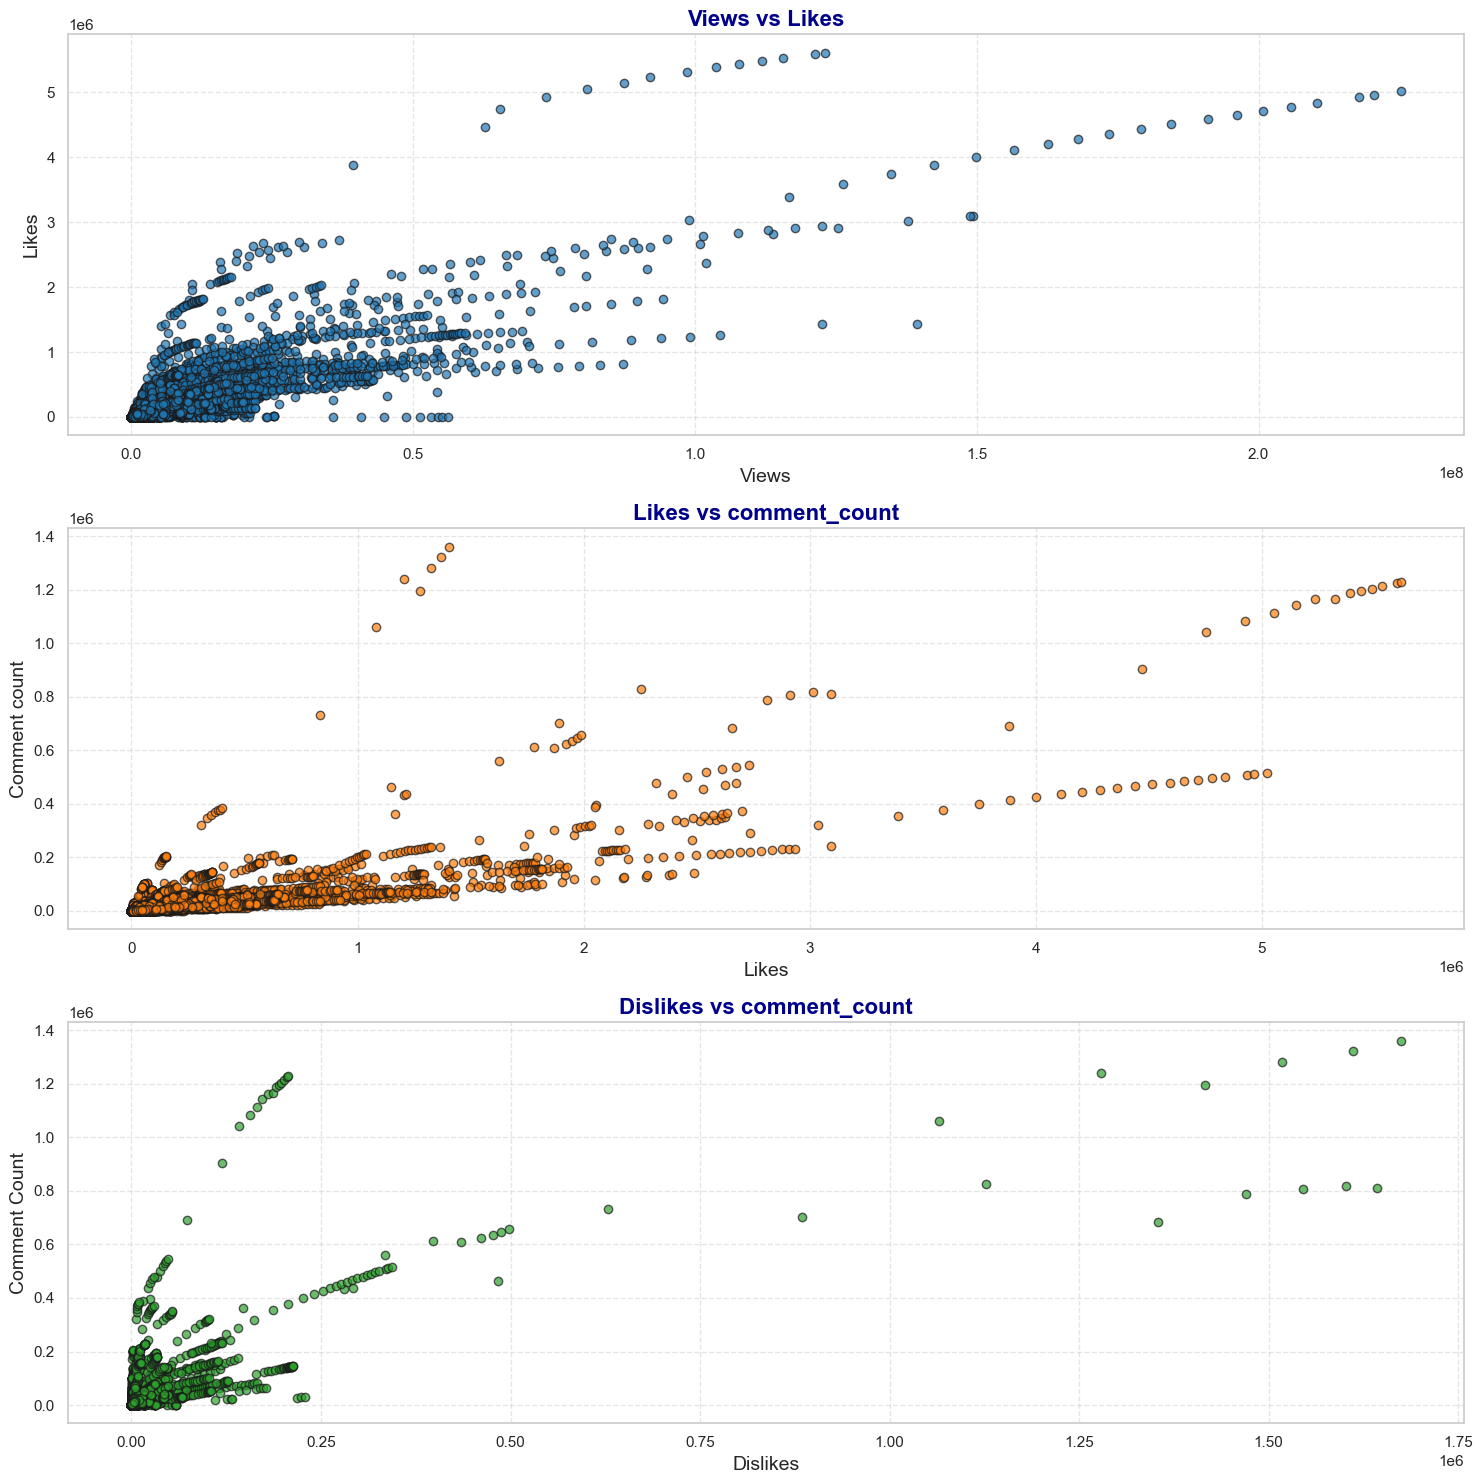

In [48]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

axs[0].scatter(x=df_completo['views'], y=df_completo['likes'], color=colors[0], alpha=0.7, edgecolor='k')
axs[0].set_title('Views vs Likes', fontsize=16, fontweight='bold', color='darkblue')
axs[0].set_xlabel('Views', fontsize=14)
axs[0].set_ylabel('Likes', fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.5)

axs[1].scatter(x=df_completo['likes'], y=df_completo['comment_count'], color=colors[1], alpha=0.7, edgecolor='k')
axs[1].set_title('Likes vs comment_count', fontsize=16, fontweight='bold', color='darkblue')
axs[1].set_xlabel('Likes', fontsize=14)
axs[1].set_ylabel('Comment count', fontsize=14)
axs[1].grid(True, linestyle='--', alpha=0.5)

axs[2].scatter(x=df_completo['dislikes'], y=df_completo['comment_count'], color=colors[2], alpha=0.7, edgecolor='k')
axs[2].set_title('Dislikes vs comment_count', fontsize=16, fontweight='bold', color='darkblue')
axs[2].set_xlabel('Dislikes', fontsize=14)
axs[2].set_ylabel('Comment Count', fontsize=14)
axs[2].grid(True, linestyle='--', alpha=0.5)

# Ajustar diseño general
plt.tight_layout()

# Mostrar gráfico
plt.show()

> Podemos notar que las tres variables estan altamente correlacionadas por lo que incluirlos en futuros modelos no seria una buena opción ya que generaria un problema llamado multicolinelidad o redundancia entre variables.

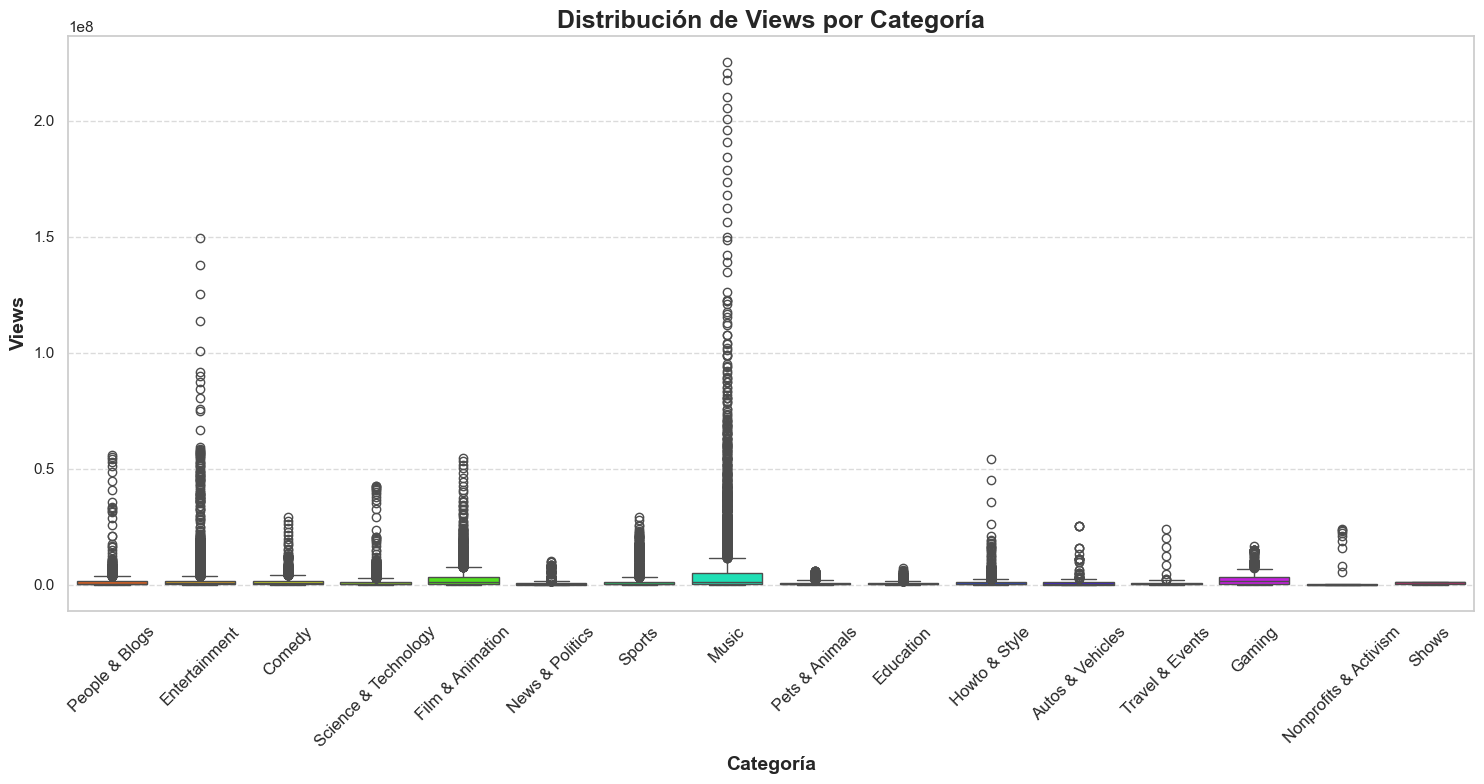

In [49]:
plt.figure(figsize=(15, 8))
# Crear el boxplot con colores distintos para cada categoría
palette = sns.color_palette("hsv", len(df_completo['category_name'].unique()))  
sns.boxplot(x='category_name', y='views', hue= 'category_name', data=df_completo, showfliers=True, palette=palette)
plt.xticks(rotation=45, fontsize=12)

plt.title("Distribución de Views por Categoría", fontsize=18, fontweight='bold')
plt.xlabel("Categoría", fontsize=14, fontweight='bold')
plt.ylabel("Views", fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [50]:
# Función para identificar valores atípicos según el IQR
def find_outliers_iqr(group):
    Q1 = group['views'].quantile(0.25)
    Q3 = group['views'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['views'] < lower_bound) | (group['views'] > upper_bound)]

# Aplicar la función por categoría
outliers = df_completo.groupby('category_name', group_keys=False).apply(find_outliers_iqr)

# Mostrar los valores atípicos
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4236 entries, 1468 to 17573
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                4236 non-null   object        
 1   trending_date           4236 non-null   datetime64[ns]
 2   title                   4236 non-null   object        
 3   channel_title           4236 non-null   object        
 4   category_id             4236 non-null   object        
 5   publish_time            4236 non-null   datetime64[ns]
 6   tags                    4236 non-null   object        
 7   views                   4236 non-null   int64         
 8   likes                   4236 non-null   int64         
 9   dislikes                4236 non-null   int64         
 10  comment_count           4236 non-null   int64         
 11  thumbnail_link          4236 non-null   object        
 12  comments_disabled       4236 non-null   bool     

>Se identificaron 4236 valores atipicos

In [51]:
# Función para calcular el promedio por categoría y reemplazar valores atípicos
def replace_outliers_with_mean(df, category_col, target_col):
    df_cleaned = df.copy()

    # Calcular los límites de valores atípicos por categoría
    def compute_bounds(group):
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return lower_bound, upper_bound

    # Calcular el promedio por categoría
    category_means = df.groupby(category_col)[target_col].transform("mean")

    # Identificar y reemplazar valores atípicos
    for category, group in df.groupby(category_col):
        lower_bound, upper_bound = compute_bounds(group)
        # Reemplazar valores menores que el límite inferior o mayores que el límite superior
        condition = (df_cleaned[category_col] == category) & (
            (df_cleaned[target_col] < lower_bound) | (df_cleaned[target_col] > upper_bound)
        )
        df_cleaned.loc[condition, target_col] = category_means[condition]

    return df_cleaned

In [52]:
# Aplicar la función para limpiar los valores atípicos en el DataFrame
df_cleaned = replace_outliers_with_mean(df_completo, category_col="category_name", target_col="views")

# Mostrar un resumen del DataFrame limpio
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  object        
 5   publish_time            40949 non-null  datetime64[ns]
 6   tags                    40949 non-null  object        
 7   views                   40949 non-null  float64       
 8   likes                   40949 non-null  int64         
 9   dislikes                40949 non-null  int64         
 10  comment_count           40949 non-null  int64         
 11  thumbnail_link          40949 non-null  object        
 12  comments_disabled       40949 non-null  bool  

In [53]:
# Función para calcular el promedio por categoría y reemplazar valores atípicos
def replace_outliers_with_mean(df, category_col, target_col):
    df_cleaned = df.copy()

    # Calcular los límites de valores atípicos por categoría
    def compute_bounds(group):
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return lower_bound, upper_bound

    # Calcular el promedio por categoría
    category_means = df.groupby(category_col)[target_col].transform("mean")

    # Identificar y reemplazar valores atípicos
    for category, group in df.groupby(category_col):
        lower_bound, upper_bound = compute_bounds(group)
        # Reemplazar valores menores que el límite inferior o mayores que el límite superior
        condition = (df_cleaned[category_col] == category) & (
            (df_cleaned[target_col] < lower_bound) | (df_cleaned[target_col] > upper_bound)
        )
        df_cleaned.loc[condition, target_col] = category_means[condition]

    return df_cleaned

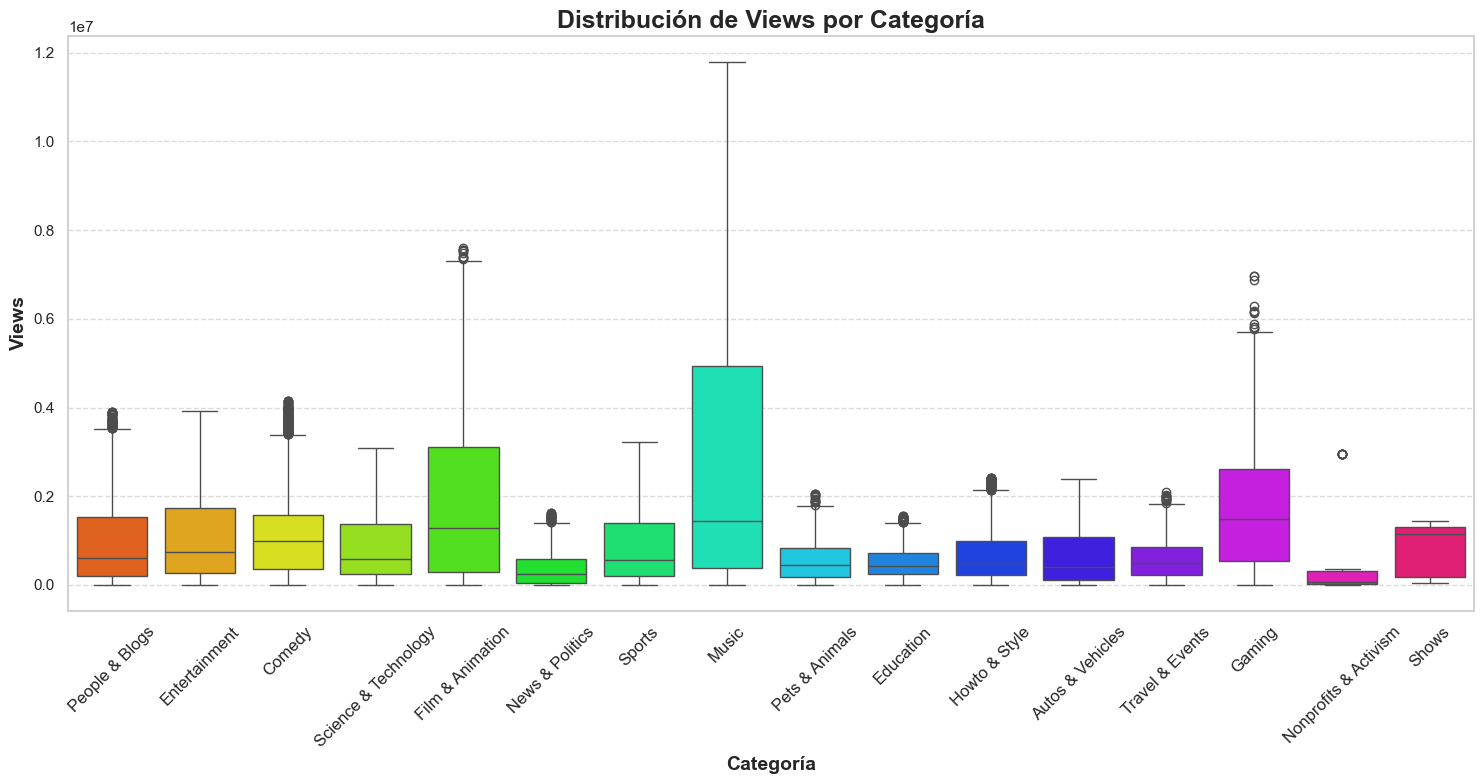

In [54]:
plt.figure(figsize=(15, 8))

# Crear el boxplot con colores distintos para cada categoría
palette = sns.color_palette("hsv", len(df_cleaned['category_name'].unique()))  
sns.boxplot(x='category_name', y='views', hue= 'category_name', data=df_cleaned, showfliers=True, palette=palette)

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, fontsize=12)

# Agregar título y etiquetas a los ejes
plt.title("Distribución de Views por Categoría", fontsize=18, fontweight='bold')
plt.xlabel("Categoría", fontsize=14, fontweight='bold')
plt.ylabel("Views", fontsize=14, fontweight='bold')

# Agregar una cuadrícula para mayor claridad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar la distribución para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

> Visualización de la distribución de vistas por categoria sin incluir valores atipicos

# Modelos

## Modelo OLS y RF v1

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [59]:
# Seleccionar las columnas para los modelos
features = ['publish_year', 'publish_month', 'publish_day', 'publish_hour', 
            'title_word_count', 'description_word_count', 
            'comment_count','days_to_trend','category_name']
prediccion = ['views']

datos = df_completo[features + prediccion].copy()
# Convertir las variables categóricas en variables dummy
datos = pd.get_dummies(datos, columns=['category_name'], drop_first=True)

In [60]:
datos.head()

publish_year  publish_month  publish_day  publish_hour  title_word_count  \
0          2017             11           13            17                 7   
1          2017             11           13             7                10   
2          2017             11           12            19                 8   
3          2017             11           13            11                 5   
4          2017             11           12            18                 5   

   description_word_count  comment_count  days_to_trend    views  \
0                     124          15954              0   748374   
1                      80          12703              0  2418783   
2                      53           8181              1  3191434   
3                     118           2146              0   343168   
4                      53          17518              1  2095731   

   category_name_Comedy  ...  category_name_Howto & Style  \
0                 False  ...                        False   
1                 False  ...                        False   
2                  True  ...                        False   
3                 False  ...                        False   
4                 False  ...                        False   

   category_name_Music  category_name_News & Politics  \
0                False                          False   
1                False                          False   
2                False                          False   
3                False                          False   
4                False                          False   

   category_name_Nonprofits & Activism  category_name_People & Blogs  \
0                                False                          True   
1                                False                         False   
2                                False                         False   
3                                False                         False   
4                                False                         False   

   category_name_Pets & Animals  category_name_Science & Technology  \
0                         False                               False   
1                         False                               False   
2                         False                               False   
3                         False                               False   
4                         False                               False   

   category_name_Shows  category_name_Sports  category_name_Travel & Events  
0                False                 False                          False  
1                False                 False                          False  
2                False                 False                          False  
3                False                 False                          False  
4                False                 False                          False  

[5 rows x 24 columns]

In [61]:
# X será el conjunto de características (features)
X = datos.drop(columns=prediccion)

In [62]:
y = datos['views']

In [63]:
# 2. Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# 3. Modelo de regresión lineal OLS
# Agregar una constante para la intersección
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)
# Convierte las columnas de tipo 'object' a numérico
X_train_ols = X_train_ols.apply(pd.to_numeric, errors='coerce')
print("Tamaño del conjunto de entrenamiento:", X_train_ols.shape)
print("Tamaño del conjunto de prueba:", X_test_ols.shape)

Tamaño del conjunto de entrenamiento: (32759, 24)
Tamaño del conjunto de prueba: (8190, 24)


In [65]:
# Ajustar el modelo OLS
LR_model = LinearRegression()
LR_model.fit(X_train_ols, y_train)

LinearRegression()

In [66]:
# Ver los resultados del modelo OLS
# Hacer predicciones
y_pred = LR_model.predict(X_test_ols)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Calcular MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calcular RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calcular MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Mostrar las métricas
print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R²: 0.43709346158408546
MSE: 27104625973531.72
RMSE: 5206210.327438925
MAE: 1995540.60700666


In [67]:
# 4. Modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
# Predicciones y evaluación para el modelo de Random Forest
rf_predictions = rf_model.predict(X_test)
print(f'Mean Squared Error (Random Forest): {mean_squared_error(y_test, rf_predictions)}')
print(f'R2 Score (Random Forest): {r2_score(y_test, rf_predictions)}')

Mean Squared Error (Random Forest): 1249587982107.3354
R2 Score (Random Forest): 0.9740486643814582


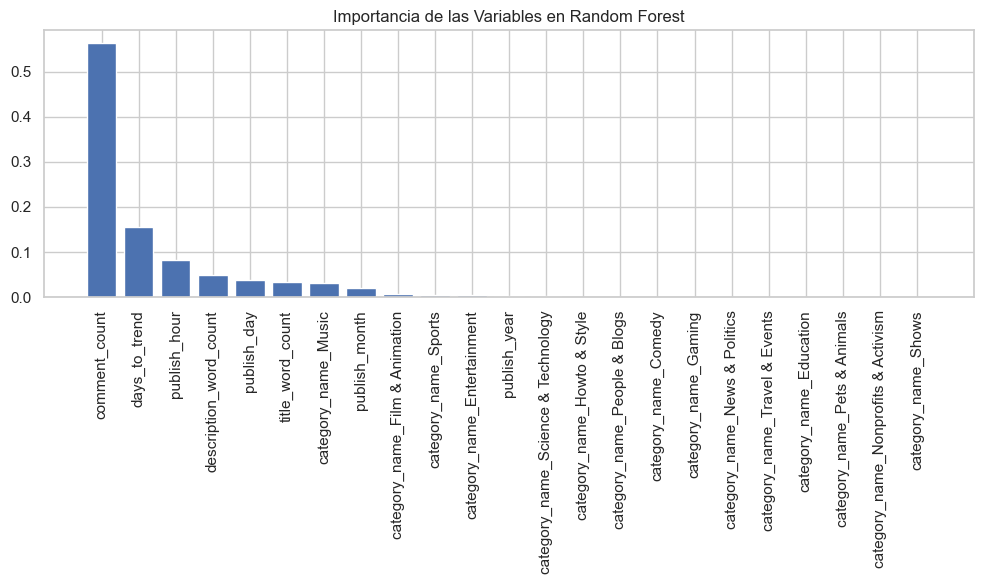

In [66]:
# Obtener la importancia de las características
importances = rf_model.feature_importances_

# Ordenar las características por importancia
indices = np.argsort(importances)[::-1]

# Graficar
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Variables en Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

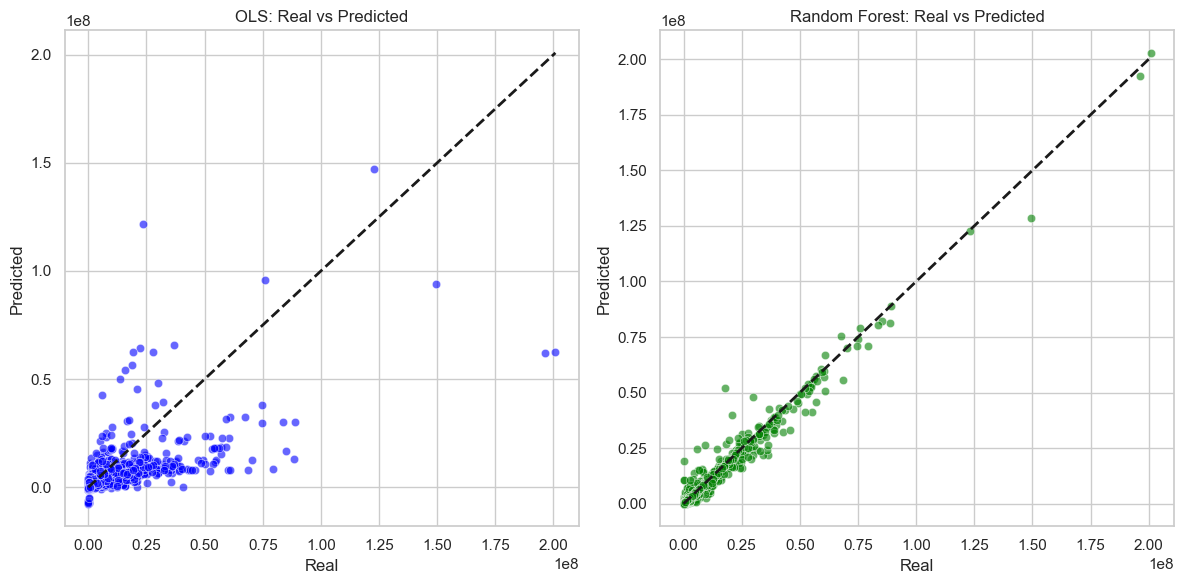

In [67]:
results = pd.DataFrame({
    'Real': y_test,
    'OLS_Predicted': y_pred,
    'RF_Predicted': rf_predictions
})

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar OLS
plt.subplot(1, 2, 1)
sns.scatterplot(x=results['Real'], y=results['OLS_Predicted'], color='blue', alpha=0.6)
plt.plot([results['Real'].min(), results['Real'].max()], [results['Real'].min(), results['Real'].max()], 'k--', lw=2)
plt.title('OLS: Real vs Predicted')
plt.xlabel('Real')
plt.ylabel('Predicted')

# Graficar Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=results['Real'], y=results['RF_Predicted'], color='green', alpha=0.6)
plt.plot([results['Real'].min(), results['Real'].max()], [results['Real'].min(), results['Real'].max()], 'k--', lw=2)
plt.title('Random Forest: Real vs Predicted')
plt.xlabel('Real')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

## Modelo LR Y RF V2

In [68]:
# Seleccionar las columnas para los modelos
features2 = ['publish_hour', 'days_to_trend',
             'description_word_count','category_name','comment_count']
prediccion2 = ['views']

datos2 = df_completo[features2 + prediccion2].copy()
# Convertir las variables categóricas en variables dummy
datos2 = pd.get_dummies(datos2, columns=['category_name'], drop_first=True)

In [69]:
# X será el conjunto de características (features)
X2 = datos2.drop(columns=prediccion)

In [70]:
y2 = datos2['views']

In [71]:
# 2. Dividir los datos en conjunto de entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [72]:
# 3. Modelo de regresión lineal OLS
# Agregar una constante para la intersección
X_train_ols2 = sm.add_constant(X_train2)
X_test_ols2 = sm.add_constant(X_test2)


In [73]:
# Ajustar el modelo OLS
LR_model2 = LinearRegression()
LR_model2.fit(X_train_ols2, y_train2)

LinearRegression()

In [74]:
# Ver los resultados del modelo OLS
# Hacer predicciones
y_pred2 = LR_model2.predict(X_test_ols2)

# Calcular R²
r22 = r2_score(y_test2, y_pred2)

# Calcular MSE (Mean Squared Error)
mse2 = mean_squared_error(y_test2, y_pred2)

# Calcular RMSE (Root Mean Squared Error)
rmse2 = np.sqrt(mse2)

# Calcular MAE (Mean Absolute Error)
mae2 = mean_absolute_error(y_test2, y_pred2)

# Mostrar las métricas
print(f"R²: {r22}")
print(f"MSE: {mse2}")
print(f"RMSE: {rmse2}")
print(f"MAE: {mae2}")

R²: 0.42172717707196417
MSE: 27844531030374.71
RMSE: 5276791.736498107
MAE: 1942839.56648404


In [75]:
y_pred_ols2 = LR_model2.predict(X_test_ols2)

In [76]:
# Seleccionar las columnas para los modelos
featuresRF = ['publish_day', 'publish_hour', 
            'title_word_count', 'description_word_count', 
            'days_to_trend','category_name']
datos_rf = df_completo[featuresRF + prediccion2].copy()
# Convertir las variables categóricas en variables dummy
datos_rf = pd.get_dummies(datos_rf, columns=['category_name'], drop_first=True)

In [77]:
# X será el conjunto de características (features)
X_rf = datos_rf.drop(columns=prediccion2)

In [78]:
y_rf = datos_rf['views']

In [79]:
# 2. Dividir los datos en conjunto de entrenamiento y prueba
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [80]:
# 4. Modelo de Random Forest
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model2.fit(X_train_rf, y_train_rf)

RandomForestRegressor(random_state=42)

In [81]:
# Predicciones y evaluación para el modelo de Random Forest
rf_predictions2 = rf_model2.predict(X_test_rf)
rms_rf = np.sqrt(mean_squared_error(y_test_rf, rf_predictions2))
print(f'Mean Squared Error (Random Forest): {mean_squared_error(y_test_rf, rf_predictions2)}')
print(f'R2 Score (Random Forest): {r2_score(y_test_rf, rf_predictions2)}')

Mean Squared Error (Random Forest): 4008617040937.0664
R2 Score (Random Forest): 0.9167493864496624


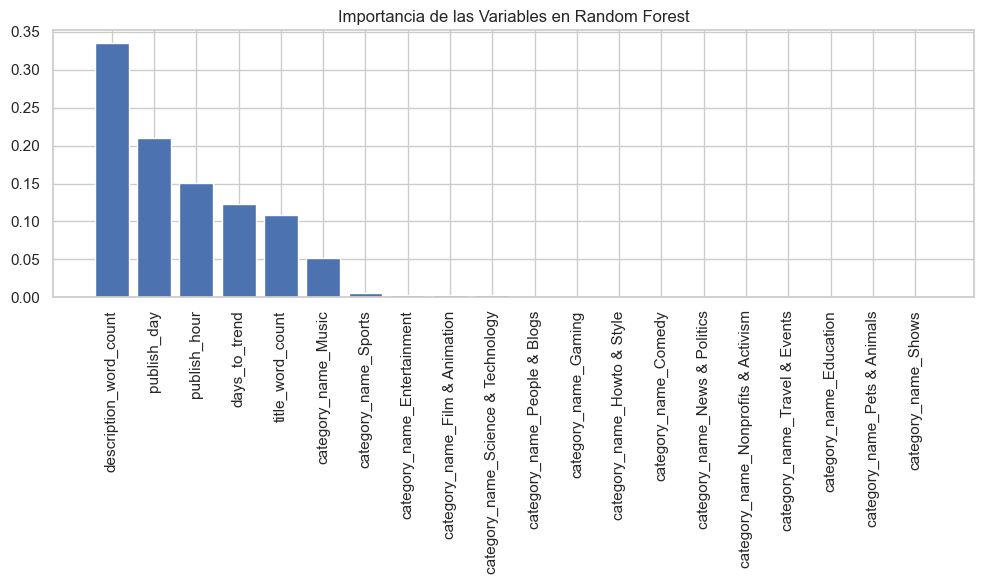

In [82]:
# Obtener la importancia de las características
importances = rf_model2.feature_importances_

# Ordenar las características por importancia
indices = np.argsort(importances)[::-1]

# Graficar
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Variables en Random Forest")
plt.bar(range(X_train_rf.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_rf.shape[1]), X_train_rf.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

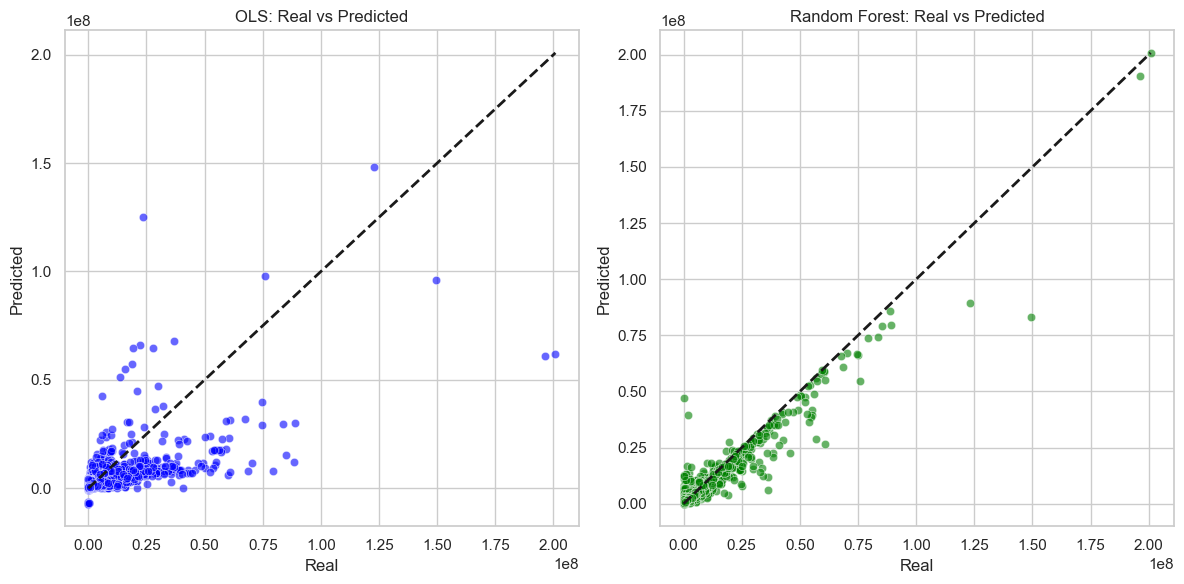

In [83]:
results = pd.DataFrame({
    'Real': y_test_rf,
    'OLS_Predicted': y_pred_ols2,
    'RF_Predicted': rf_predictions2
})

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=results['Real'], y=results['OLS_Predicted'], color='blue', alpha=0.6)
plt.plot([results['Real'].min(), results['Real'].max()], [results['Real'].min(), results['Real'].max()], 'k--', lw=2)
plt.title('OLS: Real vs Predicted')
plt.xlabel('Real')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
sns.scatterplot(x=results['Real'], y=results['RF_Predicted'], color='green', alpha=0.6)
plt.plot([results['Real'].min(), results['Real'].max()], [results['Real'].min(), results['Real'].max()], 'k--', lw=2)
plt.title('Random Forest: Real vs Predicted')
plt.xlabel('Real')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

In [84]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import keras
import sys

In [85]:
# Seleccionar las columnas para los modelos
variables = ['category_name', 'days_to_trend', 'description_word_count', 'publish_hour', 'publish_day','title_word_count']
prediccion = ['views']

datos = df_completo[variables + prediccion].copy()
# Convertir las variables categóricas en variables dummy
datos = pd.get_dummies(datos, columns=['category_name'], drop_first=True)

In [86]:
# X será el conjunto de características (features)
X = datos.drop(columns=prediccion)
y = datos['views']

In [87]:
# 2. Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Normalizar los datos (escalado de características)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
# Configurar el modelo
# Crear el modelo secuencial
model = models.Sequential()

# Capa de entrada (input layer) con 6 características y una capa oculta
model.add(layers.Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Capa densa con 128 neuronas
model.add(layers.Dropout(0.2))  # Dropout para evitar el sobreajuste
# Segunda capa oculta
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))  # Capa oculta con 64 neuronas
# Capa de salida (output layer) - una sola neurona para la predicción de 'views'
model.add(layers.Dense(1,activation='linear'))  # Capa de salida sin función de activación para regresión

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2688      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                        

In [227]:
# EarlyStopping para detener el entrenamiento si el val_loss no mejora después de varias épocas
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenamiento del modelo
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_test, y_test),  # Usamos el conjunto de prueba para la validación
                    callbacks=[early_stopping],  # Agregamos el callback de early stopping
                    verbose=1)

Epoch 1/50
1024/1024 [==============================] - 3s 2ms/step - loss: 61851421376512.0000 - mae: 2360233.5000 - val_loss: 53527019782144.0000 - val_mae: 2334802.7500
Epoch 2/50
1024/1024 [==============================] - 1s 1ms/step - loss: 61396008042496.0000 - mae: 2316619.5000 - val_loss: 52586560356352.0000 - val_mae: 2251940.5000
Epoch 3/50
1024/1024 [==============================] - 1s 1ms/step - loss: 60125435920384.0000 - mae: 2209904.7500 - val_loss: 50536841740288.0000 - val_mae: 2101617.0000
Epoch 4/50
1024/1024 [==============================] - 1s 1ms/step - loss: 57850139246592.0000 - mae: 2084446.5000 - val_loss: 48265219276800.0000 - val_mae: 1999135.5000
Epoch 5/50
1024/1024 [==============================] - 1s 1ms/step - loss: 55248735436800.0000 - mae: 2023880.1250 - val_loss: 45941470003200.0000 - val_mae: 1965676.8750
Epoch 6/50
1024/1024 [==============================] - 1s 1ms/step - loss: 52705355628544.0000 - mae: 2064835.7500 - val_loss: 428193643233

In [228]:
# Evaluación del modelo en los datos de prueba
loss = model.evaluate(X_test, y_test)
print(f'Loss en conjunto de prueba: {loss}')

256/256 [==============================] - 0s 879us/step - loss: 23256692162560.0000 - mae: 2009942.3750
Loss en conjunto de prueba: [23256692162560.0, 2009942.375]


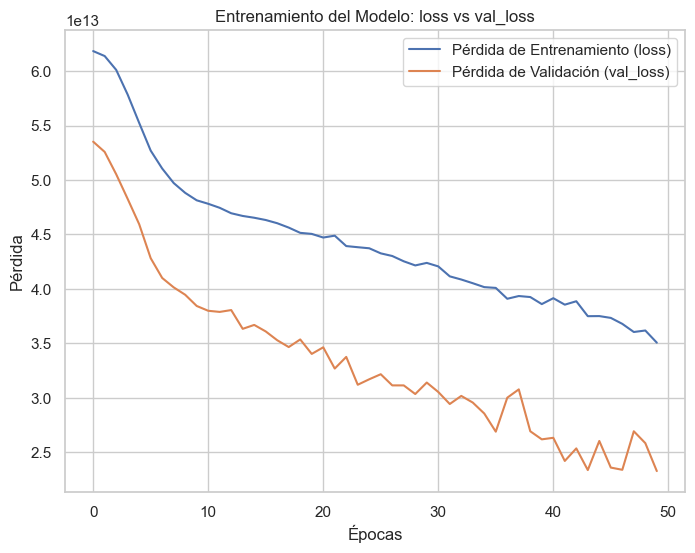

In [229]:
# Graficar loss y val_loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento (loss)')
plt.plot(history.history['val_loss'], label='Pérdida de Validación (val_loss)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Entrenamiento del Modelo: loss vs val_loss')
plt.legend()
plt.show()

In [230]:
predictions_dp = model.predict(X_test)


256/256 [==============================] - 0s 667us/step


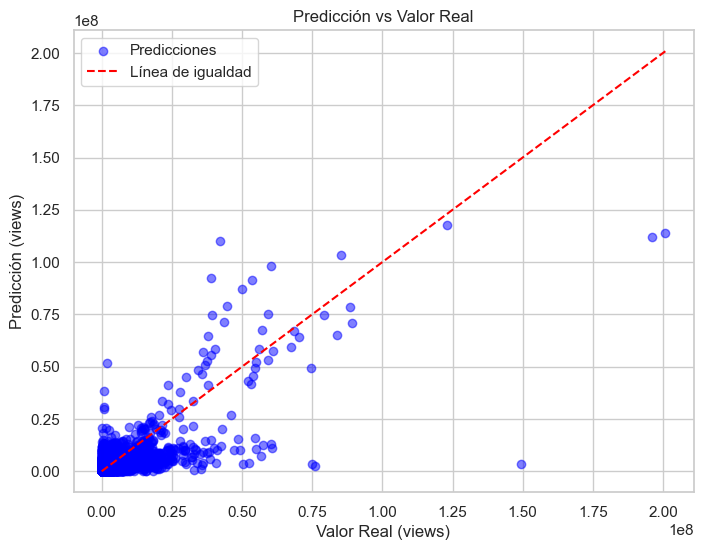

In [231]:
# Graficar las predicciones vs los valores reales
plt.figure(figsize=(8, 6))

# Graficar la comparación de predicciones vs valores reales
plt.scatter(y_test2, predictions_dp , color='blue', alpha=0.5, label='Predicciones')

# Graficar la línea de igualdad (línea diagonal donde predicción = valor real)
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red', linestyle='--', label='Línea de igualdad')

# Añadir etiquetas y título
plt.xlabel('Valor Real (views)')
plt.ylabel('Predicción (views)')
plt.title('Predicción vs Valor Real')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

In [232]:
# Calcular el R² (Coeficiente de Determinación)
r2_d = r2_score(y_test2, predictions_dp)
print(f"R²: {r2_d}")

# Calcular el RMSE (Root Mean Squared Error)
rmse_d = np.sqrt(mean_squared_error(y_test2, predictions_dp))
print(f"RMSE: {rmse_d}")


R²: 0.5170071125030518
RMSE: 4822518.923649787


In [233]:
rmses = {'LR': rmse, 'RF':rms_rf, 'DL': rmse_d}
rmses

{'OLS': 5206210.327438925, 'RF': 2002153.1012729937, 'DL': 4822518.923649787}

In [236]:
# Hacer las predicciones con los tres modelos
y_pred_model1 = y_pred2
y_pred_model2 = rf_predictions2
y_pred_model3 = predictions_dp

# Crear un DataFrame con los valores reales y las tres predicciones
df_comparison = pd.DataFrame({
    'Real_Values': y_test_rf,  # Valores reales
    'OLS': y_pred_model1.flatten(),  # Predicciones del primer modelo
    'Random Forest': y_pred_model2.flatten(),  # Predicciones del segundo modelo
    'DeepLearning': y_pred_model3.flatten()   # Predicciones del tercer modelo
})

# Mostrar las primeras filas del DataFrame
df_comparison.tail(15)

Real_Values           OLS  Random Forest  DeepLearning
7359         27765  4.196523e+06     1943358.80  6.317329e+06
7448        649995  7.349408e+05      629129.60  6.973320e+04
36112       433852  9.851239e+05      555282.97  1.508623e+06
22298       274108  1.041327e+06      391481.65  7.443575e+04
239         137860  1.113174e+06      709686.42  1.726189e+06
9392       1823566  2.643648e+06     2208021.56  2.602964e+06
18686       380501  9.414125e+05      583074.44  5.883864e+05
16730       223762  1.295563e+06      402885.35  3.099496e+06
1918          5208  1.300308e+05       75632.48  4.821804e+04
31001      3610250  9.183813e+05     2748095.86  3.805529e+05
2074        506084  7.019574e+05      490392.63  5.667016e+04
34074       350313  1.012643e+06      348448.77  1.194810e+05
2799          5696  6.766885e+05     1270372.46  1.579104e+06
22972      1469234  1.052410e+07     1737334.64  7.419143e+04
8561        715332  7.522778e+05      699545.36  4.622948e+05

# Analisis de agrupaciones 

In [91]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  object        
 5   publish_time            40949 non-null  datetime64[ns]
 6   tags                    40949 non-null  object        
 7   views                   40949 non-null  int64         
 8   likes                   40949 non-null  int64         
 9   dislikes                40949 non-null  int64         
 10  comment_count           40949 non-null  int64         
 11  thumbnail_link          40949 non-null  object        
 12  comments_disabled       40949 non-null  bool  

> Declare las variables 

In [242]:
var1 = df_completo["category_name"]
var2 = df_completo[["category_name","publish_day","publish_hour", "title_word_count"]]

In [243]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

var2["category_name"] = le.fit_transform(var2["category_name"])

var1 = le.transform(var1)

C:\Users\lposada\AppData\Local\Temp\ipykernel_35768\2608983383.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var2["category_name"] = le.fit_transform(var2["category_name"])


In [244]:
var2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   category_name     40949 non-null  int32
 1   publish_day       40949 non-null  int32
 2   publish_hour      40949 non-null  int32
 3   title_word_count  40949 non-null  int64
dtypes: int32(3), int64(1)
memory usage: 799.9 KB


In [245]:
var2.head()

category_name  publish_day  publish_hour  title_word_count
0             10           13            17                 7
1              3           13             7                10
2              1           12            19                 8
3              3           13            11                 5
4              3           12            18                 5

In [246]:
cols = var2.columns

In [247]:
from sklearn.preprocessing import MinMaxScaler

In [248]:
ms = MinMaxScaler()

var2 = ms.fit_transform(var2)

In [249]:

var2 = pd.DataFrame(var2, columns=[cols])

In [250]:
var2.head()

category_name publish_day publish_hour title_word_count
0      0.666667    0.400000     0.739130             0.35
1      0.200000    0.400000     0.304348             0.50
2      0.066667    0.366667     0.826087             0.40
3      0.200000    0.400000     0.478261             0.25
4      0.200000    0.366667     0.782609             0.25

In [251]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(var2)


KMeans(n_clusters=2, random_state=0)

In [252]:
kmeans.cluster_centers_

array([[0.40202691, 0.25044129, 0.5868646 , 0.39160878],
       [0.40839855, 0.73139022, 0.60956386, 0.39332638]])

In [253]:
kmeans.inertia_

7688.918223094821

In [254]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(var1 == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, var1.size))

Result: 2078 out of 40949 samples were correctly labeled.


In [255]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(var2.size)))

Accuracy score: 0.01


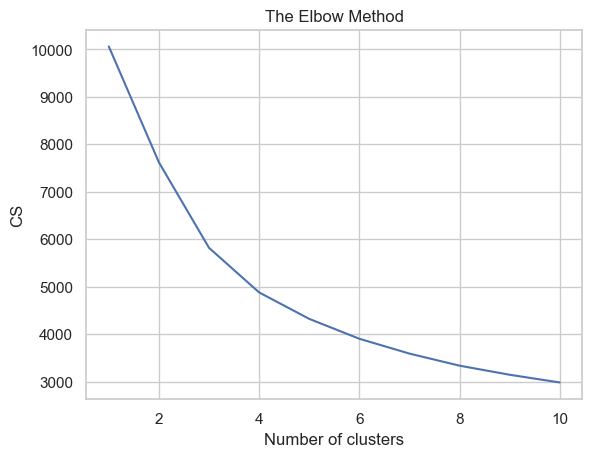

In [256]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(var2)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [257]:
kmeans1 = KMeans(n_clusters=4,random_state=0)

kmeans1.fit(var2)

labels = kmeans1.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(var1 == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, var1.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(var2.size)))

Result: 1758 out of 40949 samples were correctly labeled.
Accuracy score: 0.01


In [258]:
kmeans1 = KMeans(n_clusters=6,random_state=0)

kmeans1.fit(var2)

labels = kmeans1.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(var1 == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, var1.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(var2.size)))

Result: 1619 out of 40949 samples were correctly labeled.
Accuracy score: 0.01


In [259]:
kmeans1 = KMeans(n_clusters=8,random_state=0)

kmeans1.fit(var2)

labels = kmeans1.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(var1 == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, var1.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(var2.size)))

Result: 3116 out of 40949 samples were correctly labeled.
Accuracy score: 0.02


In [260]:
from sklearn.decomposition import PCA

In [261]:
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(var2)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Mostrar los resultados
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", sum(pca.explained_variance_ratio_))
print(df_pca.head())

Varianza explicada por cada componente: [0.32821458 0.31406077]
Varianza total explicada: 0.6422753503242081
        PC1       PC2
0 -0.005773  0.121593
1 -0.248310 -0.111386
2  0.091137  0.311556
3 -0.128250  0.021403
4  0.050259  0.261684


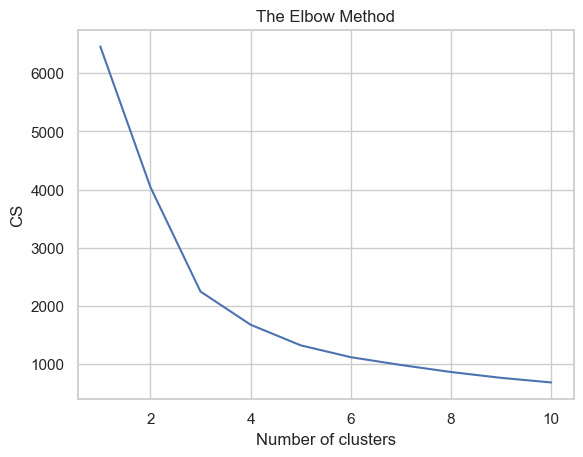

In [262]:
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(df_pca)
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_pca)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [263]:
kmeans1 = KMeans(n_clusters=3,random_state=0)
kmeans1.fit(df_pca)
print(kmeans1.inertia_)
labels = kmeans1.labels_


2244.3470605645452


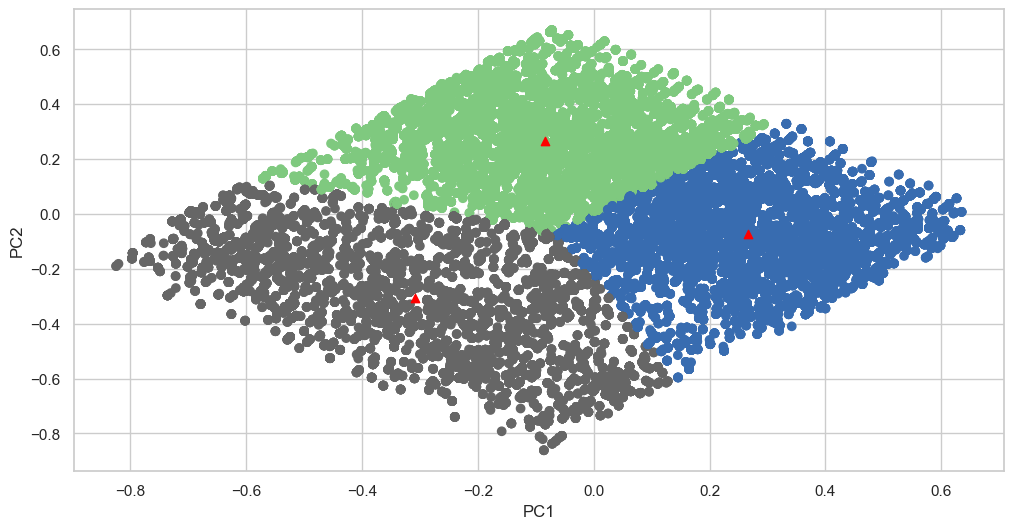

In [264]:
plt.figure(figsize=(12,6))   
plt.scatter(df_pca['PC1'],df_pca['PC2'],c =  kmeans1.fit_predict(df_pca), cmap='r')
plt.grid(True)
for center in kmeans1.cluster_centers_:
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [265]:
# Obtener la varianza explicada
explained_variance = pca.explained_variance_ratio_

# Mostrar resultados
print(f"Varianza explicada por PC1: {explained_variance[0]:.4f}")
print(f"Varianza explicada por PC2: {explained_variance[1]:.4f}")
print(f"Varianza total explicada: {sum(explained_variance):.4f}")

Varianza explicada por PC1: 0.3282
Varianza explicada por PC2: 0.3141
Varianza total explicada: 0.6423


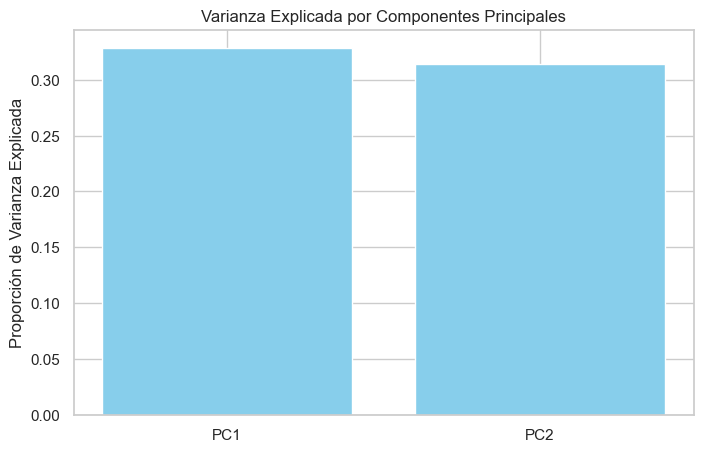

In [266]:
plt.figure(figsize=(8, 5))
plt.bar(["PC1", "PC2"], explained_variance, color='skyblue')
plt.ylabel("Proporción de Varianza Explicada")
plt.title("Varianza Explicada por Componentes Principales")
plt.show()

In [267]:
loadings = pca.components_

# Crear un DataFrame para las cargas
variables = var2.columns
pc_loadings = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=variables)

# Mostrar la contribución de las variables a cada componente
print("Contribución de cada variable a los componentes principales:")
print(pc_loadings)

Contribución de cada variable a los componentes principales:
                       PC1       PC2
category_name    -0.107095 -0.178195
publish_day       0.736929 -0.674562
publish_hour      0.667239  0.715613
title_word_count -0.016076 -0.033339


<Figure size 1000x600 with 0 Axes>

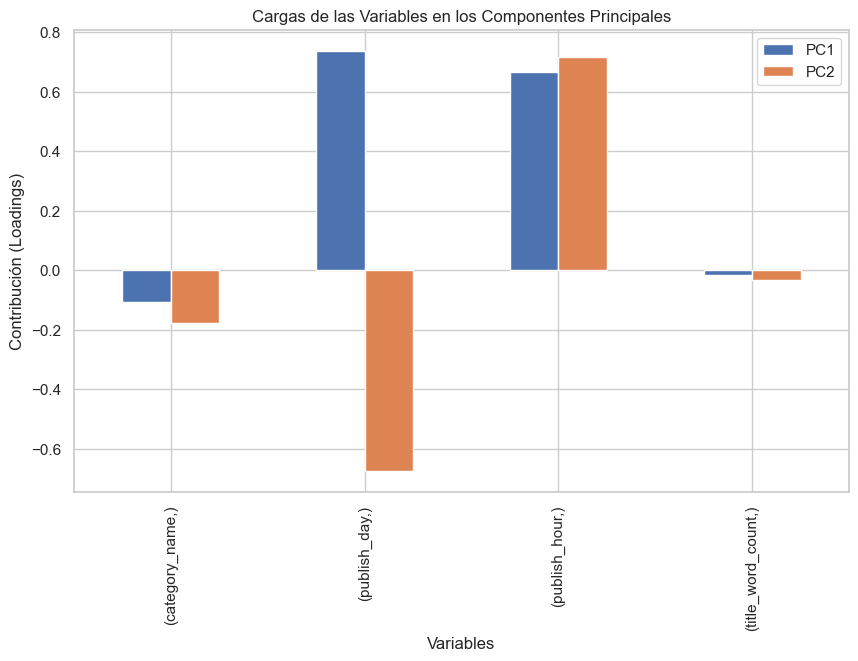

In [268]:
import matplotlib.pyplot as plt

# Gráfico de las cargas para PC1 y PC2
plt.figure(figsize=(10, 6))
pc_loadings.plot(kind='bar', figsize=(10, 6))
plt.title("Cargas de las Variables en los Componentes Principales")
plt.ylabel("Contribución (Loadings)")
plt.xlabel("Variables")
plt.grid(True)
plt.show()

In [291]:
data_final = df_completo[["category_name","publish_day","publish_hour", "title_word_count","views"]]
data_final['Cluster'] = kmeans1.labels_
data_final.head()

C:\Users\lposada\AppData\Local\Temp\ipykernel_35768\2070659031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['Cluster'] = kmeans1.labels_


category_name  publish_day  publish_hour  title_word_count    views  \
0  People & Blogs           13            17                 7   748374   
1   Entertainment           13             7                10  2418783   
2          Comedy           12            19                 8  3191434   
3   Entertainment           13            11                 5   343168   
4   Entertainment           12            18                 5  2095731   

   Cluster  
0        0  
1        2  
2        0  
3        0  
4        0

In [293]:
cols1=data_final.columns
print(cols1)

Index(['category_name', 'publish_day', 'publish_hour', 'title_word_count',
       'views', 'Cluster'],
      dtype='object')


In [290]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category_name     40949 non-null  object
 1   publish_day       40949 non-null  int32 
 2   publish_hour      40949 non-null  int32 
 3   title_word_count  40949 non-null  int64 
 4   Cluster           40949 non-null  int32 
dtypes: int32(3), int64(1), object(1)
memory usage: 1.1+ MB


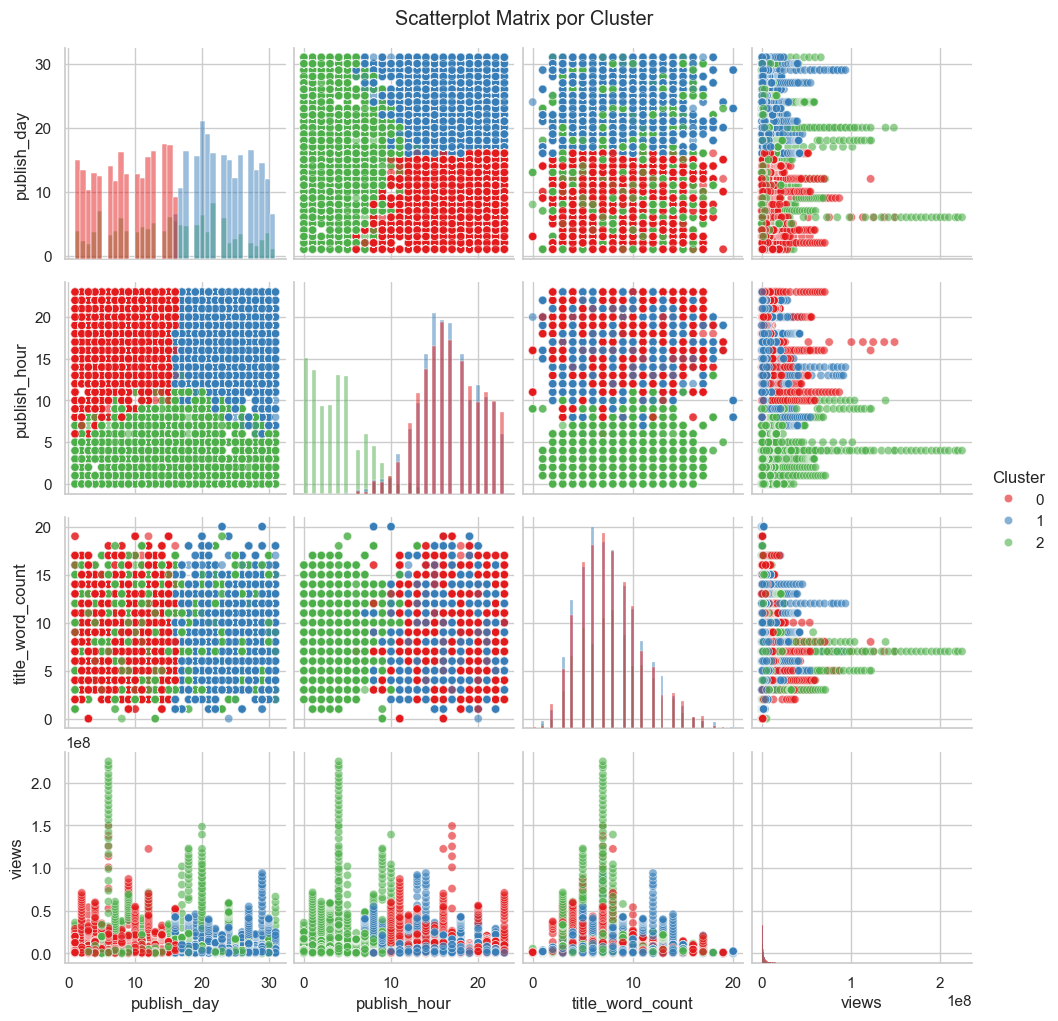

In [294]:
# Crear el scatterplot matrix (pairplot)
sns.pairplot(data_final, hue='Cluster', palette='Set1', diag_kind='hist', plot_kws={'alpha':0.6})

# Título y ajuste de la visualización
plt.suptitle("Scatterplot Matrix por Cluster", y=1.02)
plt.show()